In [1]:
import pandas as pd
train_fear_df = pd.read_csv("feartraindata.txt","\t")
test_fear_df = pd.read_csv("feartestdata.txt","\t")

In [2]:
from konlpy.tag import Okt
okt_fear = Okt()
okt_fear.pos(u'전람회 나간다')

[('전람회', 'Noun'), ('나간다', 'Verb')]

In [3]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_fear.pos(doc, norm=True, stem=True)]

In [4]:
train_fear_df.isnull().any()
train_fear_df['document'] = train_fear_df['document'].fillna('');
train_fear_df.isnull().any()
test_fear_df['document'] = test_fear_df['document'].fillna('');

In [5]:
train_fear_docs = [(tokenize(row[1]), row[2]) for row in train_fear_df.values]
test_fear_docs = [(tokenize(row[1]),row[2]) for row in test_fear_df.values]

In [6]:
print(train_fear_docs[0])
print(test_fear_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 1)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 1)


In [7]:
tokens = [t for d in train_fear_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 71499


In [8]:
import nltk
fear_text = nltk.Text(tokens, name='NMSC')
print(len(fear_text.tokens))
print(len(set(fear_text.tokens)))
print(fear_text.vocab().most_common(10))

71499
10035
[('하다/Verb', 2516), ('이/Josa', 1385), ('./Punctuation', 1185), ('?/Punctuation', 1131), ('가/Josa', 1130), ('../Punctuation', 979), ('에/Josa', 908), ('.../Punctuation', 679), ('은/Josa', 676), ('도/Josa', 647)]


C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51008 missing from c

C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51008 missing from current fon

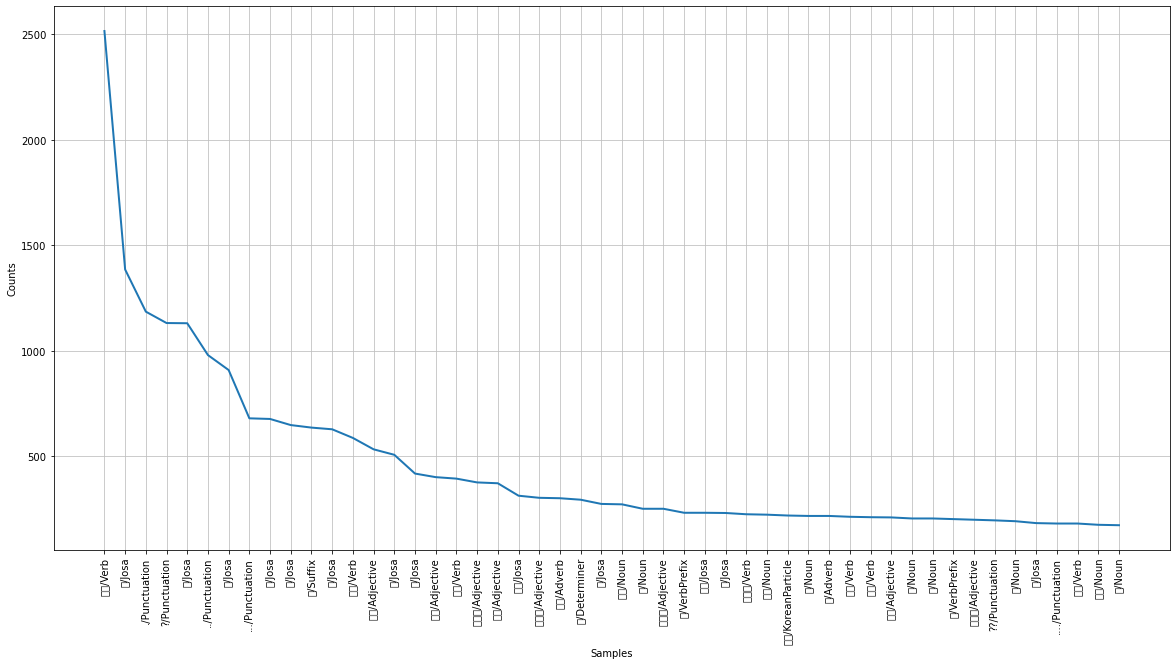

In [9]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
fear_text.plot(50)

In [10]:
FEAR_FREQUENCY_COUNT = 10000;
fear_selected_words = [f[0] for f in fear_text.vocab().most_common(FEAR_FREQUENCY_COUNT)]

In [11]:
def fear_term_frequency(doc):
    return [doc.count(word) for word in fear_selected_words]

In [12]:
x_fear_train = [fear_term_frequency(d) for d,_ in train_fear_docs]
x_fear_test = [fear_term_frequency(d) for d,_ in test_fear_docs]
y_fear_train = [c for _,c in train_fear_docs]
y_fear_test = [c for _,c in test_fear_docs]

In [13]:
import numpy as np
x_fear_train = np.asarray(x_fear_train).astype('float32')
x_fear_test = np.asarray(x_fear_test). astype('float32')

y_fear_train = np.asarray(y_fear_train).astype('float32')
y_fear_test = np.asarray(y_fear_test).astype('float32')

In [14]:
import tensorflow as tf
fear_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(FEAR_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [15]:
fear_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [16]:
fear_model.fit(x_fear_train, y_fear_train, epochs=5000, batch_size=512)

Epoch 1/5000
15/15 [==============================] - 0s 31ms/step - loss: 0.6586 - binary_accuracy: 0.6697
Epoch 2/5000
15/15 [==============================] - 0s 30ms/step - loss: 0.5205 - binary_accuracy: 0.7892
Epoch 3/5000
15/15 [==============================] - 1s 44ms/step - loss: 0.4057 - binary_accuracy: 0.8453
Epoch 4/5000
15/15 [==============================] - 0s 26ms/step - loss: 0.3204 - binary_accuracy: 0.8809
Epoch 5/5000
15/15 [==============================] - 0s 30ms/step - loss: 0.2544 - binary_accuracy: 0.9110
Epoch 6/5000
15/15 [==============================] - 0s 30ms/step - loss: 0.2019 - binary_accuracy: 0.9341
Epoch 7/5000
15/15 [==============================] - 0s 30ms/step - loss: 0.1606 - binary_accuracy: 0.9506
Epoch 8/5000
15/15 [==============================] - 0s 30ms/step - loss: 0.1266 - binary_accuracy: 0.9635
Epoch 9/5000
15/15 [==============================] - 0s 30ms/step - loss: 0.1008 - binary_accuracy: 0.9725
Epoch 10/5000
15/15 [=======

15/15 [==============================] - 0s 27ms/step - loss: 4.4179e-04 - binary_accuracy: 0.9999
Epoch 146/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.6091e-04 - binary_accuracy: 0.9999
Epoch 147/5000
15/15 [==============================] - 0s 26ms/step - loss: 5.3168e-04 - binary_accuracy: 0.9997
Epoch 148/5000
15/15 [==============================] - 0s 27ms/step - loss: 4.7737e-04 - binary_accuracy: 0.9999
Epoch 149/5000
15/15 [==============================] - 0s 27ms/step - loss: 4.1673e-04 - binary_accuracy: 0.9997
Epoch 150/5000
15/15 [==============================] - 0s 27ms/step - loss: 3.0236e-04 - binary_accuracy: 0.9999
Epoch 151/5000
15/15 [==============================] - 0s 27ms/step - loss: 5.0783e-04 - binary_accuracy: 0.9997
Epoch 152/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.5655e-04 - binary_accuracy: 0.9999
Epoch 153/5000
15/15 [==============================] - 0s 27ms/step - loss: 4.9495e-04 - binary_accura

Epoch 217/5000
15/15 [==============================] - 0s 28ms/step - loss: 4.0788e-04 - binary_accuracy: 0.9997
Epoch 218/5000
15/15 [==============================] - 0s 28ms/step - loss: 4.2181e-04 - binary_accuracy: 0.9999
Epoch 219/5000
15/15 [==============================] - 0s 28ms/step - loss: 3.6803e-04 - binary_accuracy: 0.9997
Epoch 220/5000
15/15 [==============================] - 0s 27ms/step - loss: 4.6930e-04 - binary_accuracy: 0.9997
Epoch 221/5000
15/15 [==============================] - 0s 28ms/step - loss: 3.9917e-04 - binary_accuracy: 0.9999
Epoch 222/5000
15/15 [==============================] - 0s 28ms/step - loss: 3.6280e-04 - binary_accuracy: 0.9997
Epoch 223/5000
15/15 [==============================] - 0s 29ms/step - loss: 3.9600e-04 - binary_accuracy: 0.9999
Epoch 224/5000
15/15 [==============================] - 0s 28ms/step - loss: 4.4183e-04 - binary_accuracy: 0.9997
Epoch 225/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.6298e-04 

15/15 [==============================] - 0s 27ms/step - loss: 2.6660e-04 - binary_accuracy: 0.9999
Epoch 289/5000
15/15 [==============================] - 0s 26ms/step - loss: 4.3050e-04 - binary_accuracy: 0.9997
Epoch 290/5000
15/15 [==============================] - 0s 27ms/step - loss: 4.2302e-04 - binary_accuracy: 0.9997
Epoch 291/5000
15/15 [==============================] - 0s 27ms/step - loss: 3.6047e-04 - binary_accuracy: 0.9999
Epoch 292/5000
15/15 [==============================] - 0s 28ms/step - loss: 3.9075e-04 - binary_accuracy: 0.9999
Epoch 293/5000
15/15 [==============================] - 0s 28ms/step - loss: 4.0959e-04 - binary_accuracy: 0.9997
Epoch 294/5000
15/15 [==============================] - 0s 27ms/step - loss: 4.0144e-04 - binary_accuracy: 0.9997
Epoch 295/5000
15/15 [==============================] - 0s 28ms/step - loss: 4.3292e-04 - binary_accuracy: 0.9999
Epoch 296/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.9193e-04 - binary_accura

Epoch 431/5000
15/15 [==============================] - 0s 26ms/step - loss: 4.2379e-04 - binary_accuracy: 0.9999
Epoch 432/5000
15/15 [==============================] - 0s 27ms/step - loss: 3.8131e-04 - binary_accuracy: 0.9999
Epoch 433/5000
15/15 [==============================] - 0s 26ms/step - loss: 3.9990e-04 - binary_accuracy: 0.9997
Epoch 434/5000
15/15 [==============================] - 0s 27ms/step - loss: 3.9424e-04 - binary_accuracy: 0.9999
Epoch 435/5000
15/15 [==============================] - 0s 26ms/step - loss: 3.6837e-04 - binary_accuracy: 0.9997
Epoch 436/5000
15/15 [==============================] - 0s 25ms/step - loss: 3.6394e-04 - binary_accuracy: 0.9999
Epoch 437/5000
15/15 [==============================] - 0s 26ms/step - loss: 3.5096e-04 - binary_accuracy: 0.9997
Epoch 438/5000
15/15 [==============================] - 0s 28ms/step - loss: 4.0159e-04 - binary_accuracy: 0.9999
Epoch 439/5000
15/15 [==============================] - 0s 27ms/step - loss: 3.7751e-04 

15/15 [==============================] - 0s 27ms/step - loss: 3.6566e-04 - binary_accuracy: 0.9999
Epoch 574/5000
15/15 [==============================] - 0s 27ms/step - loss: 3.3232e-04 - binary_accuracy: 0.9997
Epoch 575/5000
15/15 [==============================] - 0s 28ms/step - loss: 3.4898e-04 - binary_accuracy: 0.9999
Epoch 576/5000
15/15 [==============================] - 0s 29ms/step - loss: 3.1625e-04 - binary_accuracy: 0.9999
Epoch 577/5000
15/15 [==============================] - 0s 28ms/step - loss: 3.7893e-04 - binary_accuracy: 0.9999
Epoch 578/5000
15/15 [==============================] - 0s 27ms/step - loss: 3.0302e-04 - binary_accuracy: 0.9997
Epoch 579/5000
15/15 [==============================] - 0s 29ms/step - loss: 3.6071e-04 - binary_accuracy: 0.9999: 0s - loss: 5.0323e-05 - binary_accuracy: 1.0
Epoch 580/5000
15/15 [==============================] - 0s 26ms/step - loss: 3.4044e-04 - binary_accuracy: 0.9999
Epoch 581/5000
15/15 [==============================] - 0

Epoch 716/5000
15/15 [==============================] - 0s 25ms/step - loss: 2.9728e-04 - binary_accuracy: 0.9999
Epoch 717/5000
15/15 [==============================] - 0s 26ms/step - loss: 3.2750e-04 - binary_accuracy: 0.9999
Epoch 718/5000
15/15 [==============================] - 0s 26ms/step - loss: 3.0037e-04 - binary_accuracy: 0.9999
Epoch 719/5000
15/15 [==============================] - 0s 24ms/step - loss: 2.8067e-04 - binary_accuracy: 0.9999
Epoch 720/5000
15/15 [==============================] - 0s 28ms/step - loss: 3.0715e-04 - binary_accuracy: 0.9999
Epoch 721/5000
15/15 [==============================] - 0s 28ms/step - loss: 3.1067e-04 - binary_accuracy: 0.9999
Epoch 722/5000
15/15 [==============================] - 0s 27ms/step - loss: 3.0368e-04 - binary_accuracy: 0.9999
Epoch 723/5000
15/15 [==============================] - 0s 28ms/step - loss: 3.1963e-04 - binary_accuracy: 0.9999
Epoch 724/5000
15/15 [==============================] - 0s 27ms/step - loss: 3.0696e-04 

Epoch 859/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.5427e-04 - binary_accuracy: 0.9999
Epoch 860/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.8943e-04 - binary_accuracy: 0.9999
Epoch 861/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.9239e-04 - binary_accuracy: 0.9999
Epoch 862/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.8805e-04 - binary_accuracy: 0.9999
Epoch 863/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.6991e-04 - binary_accuracy: 0.9999
Epoch 864/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.8932e-04 - binary_accuracy: 0.9999
Epoch 865/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.8369e-04 - binary_accuracy: 0.9999
Epoch 866/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.8610e-04 - binary_accuracy: 0.9999
Epoch 867/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.9042e-04 

Epoch 1002/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.7964e-04 - binary_accuracy: 0.9999
Epoch 1003/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.6428e-04 - binary_accuracy: 0.9999
Epoch 1004/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.6640e-04 - binary_accuracy: 0.9999
Epoch 1005/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.7341e-04 - binary_accuracy: 0.9999
Epoch 1006/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.6886e-04 - binary_accuracy: 0.9999
Epoch 1007/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.6628e-04 - binary_accuracy: 0.9999
Epoch 1008/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.7353e-04 - binary_accuracy: 0.9999: 0s - loss: 6.9895e-05 - binary_accuracy: 1.
Epoch 1009/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.6793e-04 - binary_accuracy: 0.9999
Epoch 1010/5000
15/15 [============

15/15 [==============================] - 0s 28ms/step - loss: 2.5803e-04 - binary_accuracy: 0.9999
Epoch 1073/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.6506e-04 - binary_accuracy: 0.9999
Epoch 1074/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.5976e-04 - binary_accuracy: 0.9999
Epoch 1075/5000
15/15 [==============================] - 0s 27ms/step - loss: 3.5403e-04 - binary_accuracy: 0.9999
Epoch 1076/5000
15/15 [==============================] - 0s 29ms/step - loss: 3.0958e-04 - binary_accuracy: 0.9999
Epoch 1077/5000
15/15 [==============================] - 0s 27ms/step - loss: 3.0989e-04 - binary_accuracy: 0.9999
Epoch 1078/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5222e-04 - binary_accuracy: 0.9999
Epoch 1079/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.6363e-04 - binary_accuracy: 0.9999
Epoch 1080/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.5949e-04 - binar

Epoch 1143/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.5654e-04 - binary_accuracy: 0.9999
Epoch 1144/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.6682e-04 - binary_accuracy: 0.9999
Epoch 1145/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.5885e-04 - binary_accuracy: 0.9999
Epoch 1146/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.5652e-04 - binary_accuracy: 0.9999
Epoch 1147/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.5995e-04 - binary_accuracy: 0.9999
Epoch 1148/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.5779e-04 - binary_accuracy: 0.9999
Epoch 1149/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.5781e-04 - binary_accuracy: 0.9999
Epoch 1150/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.6370e-04 - binary_accuracy: 0.9999: 0s - loss: 3.0300e-04 - binary_accuracy: 0.99
Epoch 1151/5000
15/15 [==========

15/15 [==============================] - 0s 30ms/step - loss: 2.6110e-04 - binary_accuracy: 0.9999
Epoch 1285/5000
15/15 [==============================] - 0s 30ms/step - loss: 2.5616e-04 - binary_accuracy: 0.9999
Epoch 1286/5000
15/15 [==============================] - 0s 31ms/step - loss: 2.5582e-04 - binary_accuracy: 0.9999
Epoch 1287/5000
15/15 [==============================] - 0s 31ms/step - loss: 2.5859e-04 - binary_accuracy: 0.9999
Epoch 1288/5000
15/15 [==============================] - 0s 32ms/step - loss: 2.5782e-04 - binary_accuracy: 0.9999
Epoch 1289/5000
15/15 [==============================] - 0s 31ms/step - loss: 2.5716e-04 - binary_accuracy: 0.9999: 0s - loss: 2.8671e-04 - binary_accuracy: 0.9
Epoch 1290/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5687e-04 - binary_accuracy: 0.9999
Epoch 1291/5000
15/15 [==============================] - 0s 30ms/step - loss: 2.5894e-04 - binary_accuracy: 0.9999
Epoch 1292/5000
15/15 [===========================

15/15 [==============================] - 0s 31ms/step - loss: 2.6997e-04 - binary_accuracy: 0.9999
Epoch 1423/5000
15/15 [==============================] - 0s 31ms/step - loss: 2.7265e-04 - binary_accuracy: 0.9999
Epoch 1424/5000
15/15 [==============================] - 0s 31ms/step - loss: 2.6109e-04 - binary_accuracy: 0.9999
Epoch 1425/5000
15/15 [==============================] - 0s 29ms/step - loss: 2.5609e-04 - binary_accuracy: 0.9999
Epoch 1426/5000
15/15 [==============================] - 0s 31ms/step - loss: 2.5713e-04 - binary_accuracy: 0.9999
Epoch 1427/5000
15/15 [==============================] - 0s 31ms/step - loss: 2.5548e-04 - binary_accuracy: 0.9999
Epoch 1428/5000
15/15 [==============================] - 0s 31ms/step - loss: 2.5472e-04 - binary_accuracy: 0.9999
Epoch 1429/5000
15/15 [==============================] - 0s 31ms/step - loss: 2.5996e-04 - binary_accuracy: 0.9999
Epoch 1430/5000
15/15 [==============================] - 0s 31ms/step - loss: 2.5650e-04 - binar

15/15 [==============================] - 0s 29ms/step - loss: 2.5385e-04 - binary_accuracy: 0.9999
Epoch 1561/5000
15/15 [==============================] - 0s 31ms/step - loss: 2.5363e-04 - binary_accuracy: 0.9999: 0s - loss: 2.5363e-04 - binary_accuracy: 0.999
Epoch 1562/5000
15/15 [==============================] - 0s 31ms/step - loss: 2.5194e-04 - binary_accuracy: 0.9999
Epoch 1563/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.5327e-04 - binary_accuracy: 0.9999
Epoch 1564/5000
15/15 [==============================] - 0s 31ms/step - loss: 2.5312e-04 - binary_accuracy: 0.9999: 0s - loss: 2.5312e-04 - binary_accuracy: 0.999
Epoch 1565/5000
15/15 [==============================] - 0s 32ms/step - loss: 2.5334e-04 - binary_accuracy: 0.9999
Epoch 1566/5000
15/15 [==============================] - 0s 31ms/step - loss: 2.5504e-04 - binary_accuracy: 0.9999
Epoch 1567/5000
15/15 [==============================] - 0s 31ms/step - loss: 2.5284e-04 - binary_accuracy: 0.9999


15/15 [==============================] - 0s 31ms/step - loss: 2.5585e-04 - binary_accuracy: 0.9999
Epoch 1699/5000
15/15 [==============================] - 0s 31ms/step - loss: 2.5630e-04 - binary_accuracy: 0.9999
Epoch 1700/5000
15/15 [==============================] - 0s 31ms/step - loss: 2.5755e-04 - binary_accuracy: 0.9999
Epoch 1701/5000
15/15 [==============================] - 0s 31ms/step - loss: 2.5770e-04 - binary_accuracy: 0.9999
Epoch 1702/5000
15/15 [==============================] - 0s 29ms/step - loss: 2.5515e-04 - binary_accuracy: 0.9999
Epoch 1703/5000
15/15 [==============================] - 0s 30ms/step - loss: 2.5633e-04 - binary_accuracy: 0.9999
Epoch 1704/5000
15/15 [==============================] - 0s 30ms/step - loss: 2.5639e-04 - binary_accuracy: 0.9999
Epoch 1705/5000
15/15 [==============================] - 0s 30ms/step - loss: 2.5564e-04 - binary_accuracy: 0.9999
Epoch 1706/5000
15/15 [==============================] - 0s 32ms/step - loss: 2.5725e-04 - binar

Epoch 1838/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.6352e-04 - binary_accuracy: 0.9999
Epoch 1839/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.7065e-04 - binary_accuracy: 0.9999
Epoch 1840/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.6582e-04 - binary_accuracy: 0.9999
Epoch 1841/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.7120e-04 - binary_accuracy: 0.9999
Epoch 1842/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.6754e-04 - binary_accuracy: 0.9999
Epoch 1843/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.7285e-04 - binary_accuracy: 0.9999
Epoch 1844/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.6828e-04 - binary_accuracy: 0.9999
Epoch 1845/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.6523e-04 - binary_accuracy: 0.9999
Epoch 1846/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.

15/15 [==============================] - 0s 28ms/step - loss: 2.5371e-04 - binary_accuracy: 0.9999
Epoch 1981/5000
15/15 [==============================] - 0s 26ms/step - loss: 2.5445e-04 - binary_accuracy: 0.9999
Epoch 1982/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5454e-04 - binary_accuracy: 0.9999
Epoch 1983/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5446e-04 - binary_accuracy: 0.9999
Epoch 1984/5000
15/15 [==============================] - 0s 26ms/step - loss: 2.5556e-04 - binary_accuracy: 0.9999
Epoch 1985/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5573e-04 - binary_accuracy: 0.9999
Epoch 1986/5000
15/15 [==============================] - 0s 26ms/step - loss: 2.5349e-04 - binary_accuracy: 0.9999
Epoch 1987/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5364e-04 - binary_accuracy: 0.9999
Epoch 1988/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5517e-04 - binar

15/15 [==============================] - 0s 32ms/step - loss: 2.5360e-04 - binary_accuracy: 0.9999
Epoch 2120/5000
15/15 [==============================] - 0s 30ms/step - loss: 2.5258e-04 - binary_accuracy: 0.9999
Epoch 2121/5000
15/15 [==============================] - 0s 31ms/step - loss: 2.5423e-04 - binary_accuracy: 0.9999
Epoch 2122/5000
15/15 [==============================] - 0s 29ms/step - loss: 2.5416e-04 - binary_accuracy: 0.9999
Epoch 2123/5000
15/15 [==============================] - 0s 29ms/step - loss: 2.5391e-04 - binary_accuracy: 0.9999
Epoch 2124/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5360e-04 - binary_accuracy: 0.9999
Epoch 2125/5000
15/15 [==============================] - 0s 29ms/step - loss: 2.5361e-04 - binary_accuracy: 0.9999
Epoch 2126/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5292e-04 - binary_accuracy: 0.9999
Epoch 2127/5000
15/15 [==============================] - 0s 29ms/step - loss: 2.5411e-04 - binar

15/15 [==============================] - 1s 33ms/step - loss: 2.5550e-04 - binary_accuracy: 0.9999
Epoch 2191/5000
15/15 [==============================] - 1s 34ms/step - loss: 2.5414e-04 - binary_accuracy: 0.9999
Epoch 2192/5000
15/15 [==============================] - 1s 33ms/step - loss: 2.5422e-04 - binary_accuracy: 0.9999
Epoch 2193/5000
15/15 [==============================] - 1s 35ms/step - loss: 2.5513e-04 - binary_accuracy: 0.9999
Epoch 2194/5000
15/15 [==============================] - 1s 35ms/step - loss: 2.5526e-04 - binary_accuracy: 0.9999
Epoch 2195/5000
15/15 [==============================] - 1s 36ms/step - loss: 2.5450e-04 - binary_accuracy: 0.9999
Epoch 2196/5000
15/15 [==============================] - 1s 43ms/step - loss: 2.5569e-04 - binary_accuracy: 0.9999
Epoch 2197/5000
15/15 [==============================] - 1s 42ms/step - loss: 2.5344e-04 - binary_accuracy: 0.9999: 0s - loss: 2.7550e-09 - binary_accuracy:
Epoch 2198/5000
15/15 [==============================]

Epoch 2330/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5399e-04 - binary_accuracy: 0.9999
Epoch 2331/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.5523e-04 - binary_accuracy: 0.9999
Epoch 2332/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5342e-04 - binary_accuracy: 0.9999
Epoch 2333/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5329e-04 - binary_accuracy: 0.9999
Epoch 2334/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5438e-04 - binary_accuracy: 0.9999
Epoch 2335/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.5400e-04 - binary_accuracy: 0.9999
Epoch 2336/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.5388e-04 - binary_accuracy: 0.9999
Epoch 2337/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.5290e-04 - binary_accuracy: 0.9999
Epoch 2338/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.

15/15 [==============================] - 0s 29ms/step - loss: 2.5556e-04 - binary_accuracy: 0.9999
Epoch 2471/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.5442e-04 - binary_accuracy: 0.9999
Epoch 2472/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5568e-04 - binary_accuracy: 0.9999
Epoch 2473/5000
15/15 [==============================] - 0s 26ms/step - loss: 2.5242e-04 - binary_accuracy: 0.9999
Epoch 2474/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5576e-04 - binary_accuracy: 0.9999
Epoch 2475/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.5484e-04 - binary_accuracy: 0.9999: 0s - loss: 2.4265e-04 - binary_accuracy: 0.99
Epoch 2476/5000
15/15 [==============================] - 0s 29ms/step - loss: 2.5483e-04 - binary_accuracy: 0.9999
Epoch 2477/5000
15/15 [==============================] - 0s 30ms/step - loss: 2.5540e-04 - binary_accuracy: 0.9999
Epoch 2478/5000
15/15 [==========================

Epoch 2541/5000
15/15 [==============================] - 0s 29ms/step - loss: 2.5389e-04 - binary_accuracy: 0.9999
Epoch 2542/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5570e-04 - binary_accuracy: 0.9999
Epoch 2543/5000
15/15 [==============================] - 0s 26ms/step - loss: 2.5560e-04 - binary_accuracy: 0.9999
Epoch 2544/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.5483e-04 - binary_accuracy: 0.9999
Epoch 2545/5000
15/15 [==============================] - 0s 29ms/step - loss: 2.5519e-04 - binary_accuracy: 0.9999
Epoch 2546/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5454e-04 - binary_accuracy: 0.9999
Epoch 2547/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5547e-04 - binary_accuracy: 0.9999: 0s - loss: 2.7441e-09 - binary_accuracy: 
Epoch 2548/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.5553e-04 - binary_accuracy: 0.9999
Epoch 2549/5000
15/15 [==============

15/15 [==============================] - 0s 30ms/step - loss: 2.5421e-04 - binary_accuracy: 0.9999
Epoch 2683/5000
15/15 [==============================] - 0s 29ms/step - loss: 2.5550e-04 - binary_accuracy: 0.9999
Epoch 2684/5000
15/15 [==============================] - 0s 29ms/step - loss: 2.5429e-04 - binary_accuracy: 0.9999
Epoch 2685/5000
15/15 [==============================] - 0s 29ms/step - loss: 2.5519e-04 - binary_accuracy: 0.9999
Epoch 2686/5000
15/15 [==============================] - 0s 31ms/step - loss: 2.5449e-04 - binary_accuracy: 0.9999
Epoch 2687/5000
15/15 [==============================] - 0s 30ms/step - loss: 2.5570e-04 - binary_accuracy: 0.9999
Epoch 2688/5000
15/15 [==============================] - 0s 32ms/step - loss: 2.5370e-04 - binary_accuracy: 0.9999
Epoch 2689/5000
15/15 [==============================] - 0s 30ms/step - loss: 2.5552e-04 - binary_accuracy: 0.9999
Epoch 2690/5000
15/15 [==============================] - 0s 30ms/step - loss: 2.5463e-04 - binar

Epoch 2753/5000
15/15 [==============================] - 0s 29ms/step - loss: 2.5484e-04 - binary_accuracy: 0.9999
Epoch 2754/5000
15/15 [==============================] - 0s 30ms/step - loss: 2.5433e-04 - binary_accuracy: 0.9999
Epoch 2755/5000
15/15 [==============================] - 0s 31ms/step - loss: 2.5412e-04 - binary_accuracy: 0.9999
Epoch 2756/5000
15/15 [==============================] - 0s 31ms/step - loss: 2.5534e-04 - binary_accuracy: 0.9999
Epoch 2757/5000
15/15 [==============================] - 0s 30ms/step - loss: 2.5464e-04 - binary_accuracy: 0.9999
Epoch 2758/5000
15/15 [==============================] - 0s 30ms/step - loss: 2.5494e-04 - binary_accuracy: 0.9999
Epoch 2759/5000
15/15 [==============================] - 0s 29ms/step - loss: 2.5434e-04 - binary_accuracy: 0.9999
Epoch 2760/5000
15/15 [==============================] - 0s 30ms/step - loss: 2.5478e-04 - binary_accuracy: 0.9999
Epoch 2761/5000
15/15 [==============================] - 0s 31ms/step - loss: 2.

15/15 [==============================] - 0s 27ms/step - loss: 2.5408e-04 - binary_accuracy: 0.9999
Epoch 2894/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5341e-04 - binary_accuracy: 0.9999
Epoch 2895/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5268e-04 - binary_accuracy: 0.9999
Epoch 2896/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.5182e-04 - binary_accuracy: 0.9999
Epoch 2897/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5297e-04 - binary_accuracy: 0.9999
Epoch 2898/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.5341e-04 - binary_accuracy: 0.9999
Epoch 2899/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5292e-04 - binary_accuracy: 0.9999
Epoch 2900/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5317e-04 - binary_accuracy: 0.9999
Epoch 2901/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5350e-04 - binar

15/15 [==============================] - 0s 27ms/step - loss: 2.5362e-04 - binary_accuracy: 0.9999
Epoch 3035/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5514e-04 - binary_accuracy: 0.9999
Epoch 3036/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5440e-04 - binary_accuracy: 0.9999
Epoch 3037/5000
15/15 [==============================] - 0s 26ms/step - loss: 2.5481e-04 - binary_accuracy: 0.9999
Epoch 3038/5000
15/15 [==============================] - 0s 29ms/step - loss: 2.5635e-04 - binary_accuracy: 0.9999
Epoch 3039/5000
15/15 [==============================] - 0s 30ms/step - loss: 2.5554e-04 - binary_accuracy: 0.9999: 0s - loss: 2.9362e-04 - binary_accuracy: 0.99
Epoch 3040/5000
15/15 [==============================] - 0s 33ms/step - loss: 2.5441e-04 - binary_accuracy: 0.9999
Epoch 3041/5000
15/15 [==============================] - 0s 33ms/step - loss: 2.5478e-04 - binary_accuracy: 0.9999: 0s - loss: 2.8821e-04 - binary_accuracy: 0.9
Epo

15/15 [==============================] - 0s 28ms/step - loss: 2.5470e-04 - binary_accuracy: 0.9999
Epoch 3175/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5543e-04 - binary_accuracy: 0.9999
Epoch 3176/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5371e-04 - binary_accuracy: 0.9999
Epoch 3177/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5618e-04 - binary_accuracy: 0.9999
Epoch 3178/5000
15/15 [==============================] - 0s 26ms/step - loss: 2.5474e-04 - binary_accuracy: 0.9999
Epoch 3179/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5462e-04 - binary_accuracy: 0.9999
Epoch 3180/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5466e-04 - binary_accuracy: 0.9999
Epoch 3181/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5477e-04 - binary_accuracy: 0.9999
Epoch 3182/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5406e-04 - binar

15/15 [==============================] - 0s 22ms/step - loss: 2.5467e-04 - binary_accuracy: 0.9999
Epoch 3317/5000
15/15 [==============================] - 0s 23ms/step - loss: 2.5532e-04 - binary_accuracy: 0.9999
Epoch 3318/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5574e-04 - binary_accuracy: 0.9999
Epoch 3319/5000
15/15 [==============================] - 0s 21ms/step - loss: 2.5461e-04 - binary_accuracy: 0.9999
Epoch 3320/5000
15/15 [==============================] - 0s 21ms/step - loss: 2.5561e-04 - binary_accuracy: 0.9999
Epoch 3321/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5411e-04 - binary_accuracy: 0.9999
Epoch 3322/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5436e-04 - binary_accuracy: 0.9999
Epoch 3323/5000
15/15 [==============================] - 0s 21ms/step - loss: 2.5453e-04 - binary_accuracy: 0.9999
Epoch 3324/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5475e-04 - binar

15/15 [==============================] - 0s 22ms/step - loss: 2.5441e-04 - binary_accuracy: 0.9999
Epoch 3458/5000
15/15 [==============================] - 0s 21ms/step - loss: 2.5207e-04 - binary_accuracy: 0.9999
Epoch 3459/5000
15/15 [==============================] - 0s 21ms/step - loss: 2.5602e-04 - binary_accuracy: 0.9999
Epoch 3460/5000
15/15 [==============================] - 0s 21ms/step - loss: 2.5445e-04 - binary_accuracy: 0.9999
Epoch 3461/5000
15/15 [==============================] - 0s 23ms/step - loss: 2.5380e-04 - binary_accuracy: 0.9999
Epoch 3462/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5552e-04 - binary_accuracy: 0.9999
Epoch 3463/5000
15/15 [==============================] - 0s 21ms/step - loss: 2.5540e-04 - binary_accuracy: 0.9999
Epoch 3464/5000
15/15 [==============================] - 0s 21ms/step - loss: 2.5481e-04 - binary_accuracy: 0.9999
Epoch 3465/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5428e-04 - binar

15/15 [==============================] - 0s 22ms/step - loss: 2.5453e-04 - binary_accuracy: 0.9999
Epoch 3600/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5457e-04 - binary_accuracy: 0.9999
Epoch 3601/5000
15/15 [==============================] - 0s 21ms/step - loss: 2.5493e-04 - binary_accuracy: 0.9999
Epoch 3602/5000
15/15 [==============================] - 0s 21ms/step - loss: 2.5533e-04 - binary_accuracy: 0.9999
Epoch 3603/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5338e-04 - binary_accuracy: 0.9999
Epoch 3604/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5382e-04 - binary_accuracy: 0.9999
Epoch 3605/5000
15/15 [==============================] - 0s 23ms/step - loss: 2.5495e-04 - binary_accuracy: 0.9999
Epoch 3606/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5572e-04 - binary_accuracy: 0.9999
Epoch 3607/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5553e-04 - binar

Epoch 3741/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5545e-04 - binary_accuracy: 0.9999
Epoch 3742/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5379e-04 - binary_accuracy: 0.9999
Epoch 3743/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5501e-04 - binary_accuracy: 0.9999
Epoch 3744/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5462e-04 - binary_accuracy: 0.9999
Epoch 3745/5000
15/15 [==============================] - 0s 21ms/step - loss: 2.5482e-04 - binary_accuracy: 0.9999
Epoch 3746/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5402e-04 - binary_accuracy: 0.9999
Epoch 3747/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5427e-04 - binary_accuracy: 0.9999
Epoch 3748/5000
15/15 [==============================] - 0s 23ms/step - loss: 2.5472e-04 - binary_accuracy: 0.9999
Epoch 3749/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.

15/15 [==============================] - 0s 23ms/step - loss: 2.5450e-04 - binary_accuracy: 0.9999
Epoch 3884/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5406e-04 - binary_accuracy: 0.9999
Epoch 3885/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5486e-04 - binary_accuracy: 0.9999
Epoch 3886/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5428e-04 - binary_accuracy: 0.9999
Epoch 3887/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5470e-04 - binary_accuracy: 0.9999
Epoch 3888/5000
15/15 [==============================] - 0s 21ms/step - loss: 2.5498e-04 - binary_accuracy: 0.9999
Epoch 3889/5000
15/15 [==============================] - 0s 21ms/step - loss: 2.5433e-04 - binary_accuracy: 0.9999
Epoch 3890/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5511e-04 - binary_accuracy: 0.9999
Epoch 3891/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5319e-04 - binar

15/15 [==============================] - 0s 24ms/step - loss: 2.5442e-04 - binary_accuracy: 0.9999
Epoch 4026/5000
15/15 [==============================] - 0s 23ms/step - loss: 2.5467e-04 - binary_accuracy: 0.9999
Epoch 4027/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5424e-04 - binary_accuracy: 0.9999
Epoch 4028/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5431e-04 - binary_accuracy: 0.9999
Epoch 4029/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5363e-04 - binary_accuracy: 0.9999
Epoch 4030/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5491e-04 - binary_accuracy: 0.9999
Epoch 4031/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5408e-04 - binary_accuracy: 0.9999
Epoch 4032/5000
15/15 [==============================] - 0s 21ms/step - loss: 2.5409e-04 - binary_accuracy: 0.9999
Epoch 4033/5000
15/15 [==============================] - 0s 23ms/step - loss: 2.5396e-04 - binar

15/15 [==============================] - 0s 24ms/step - loss: 2.5286e-04 - binary_accuracy: 0.9999
Epoch 4168/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5282e-04 - binary_accuracy: 0.9999
Epoch 4169/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5440e-04 - binary_accuracy: 0.9999
Epoch 4170/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5403e-04 - binary_accuracy: 0.9999
Epoch 4171/5000
15/15 [==============================] - 0s 21ms/step - loss: 2.5446e-04 - binary_accuracy: 0.9999
Epoch 4172/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5377e-04 - binary_accuracy: 0.9999
Epoch 4173/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5391e-04 - binary_accuracy: 0.9999
Epoch 4174/5000
15/15 [==============================] - 0s 21ms/step - loss: 2.5385e-04 - binary_accuracy: 0.9999
Epoch 4175/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5378e-04 - binar

15/15 [==============================] - 0s 24ms/step - loss: 2.5416e-04 - binary_accuracy: 0.9999
Epoch 4310/5000
15/15 [==============================] - 0s 23ms/step - loss: 2.5432e-04 - binary_accuracy: 0.9999
Epoch 4311/5000
15/15 [==============================] - 0s 23ms/step - loss: 2.5408e-04 - binary_accuracy: 0.9999
Epoch 4312/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5491e-04 - binary_accuracy: 0.9999
Epoch 4313/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5402e-04 - binary_accuracy: 0.9999
Epoch 4314/5000
15/15 [==============================] - 0s 23ms/step - loss: 2.5308e-04 - binary_accuracy: 0.9999
Epoch 4315/5000
15/15 [==============================] - 0s 23ms/step - loss: 2.5395e-04 - binary_accuracy: 0.9999
Epoch 4316/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5493e-04 - binary_accuracy: 0.9999
Epoch 4317/5000
15/15 [==============================] - 0s 25ms/step - loss: 2.5496e-04 - binar

15/15 [==============================] - 0s 27ms/step - loss: 2.5494e-04 - binary_accuracy: 0.9999
Epoch 4452/5000
15/15 [==============================] - 0s 26ms/step - loss: 2.5504e-04 - binary_accuracy: 0.9999
Epoch 4453/5000
15/15 [==============================] - 0s 24ms/step - loss: 2.5471e-04 - binary_accuracy: 0.9999
Epoch 4454/5000
15/15 [==============================] - 0s 25ms/step - loss: 2.5542e-04 - binary_accuracy: 0.9999
Epoch 4455/5000
15/15 [==============================] - 0s 30ms/step - loss: 2.5456e-04 - binary_accuracy: 0.9999
Epoch 4456/5000
15/15 [==============================] - 0s 29ms/step - loss: 2.5500e-04 - binary_accuracy: 0.9999
Epoch 4457/5000
15/15 [==============================] - 0s 26ms/step - loss: 2.5384e-04 - binary_accuracy: 0.9999
Epoch 4458/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.5502e-04 - binary_accuracy: 0.9999
Epoch 4459/5000
15/15 [==============================] - 0s 29ms/step - loss: 2.5528e-04 - binar

Epoch 4522/5000
15/15 [==============================] - 0s 26ms/step - loss: 2.5448e-04 - binary_accuracy: 0.9999
Epoch 4523/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5349e-04 - binary_accuracy: 0.9999
Epoch 4524/5000
15/15 [==============================] - 0s 23ms/step - loss: 2.5411e-04 - binary_accuracy: 0.9999
Epoch 4525/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5398e-04 - binary_accuracy: 0.9999
Epoch 4526/5000
15/15 [==============================] - 0s 24ms/step - loss: 2.5314e-04 - binary_accuracy: 0.9999
Epoch 4527/5000
15/15 [==============================] - 0s 23ms/step - loss: 2.5560e-04 - binary_accuracy: 0.9999
Epoch 4528/5000
15/15 [==============================] - 0s 24ms/step - loss: 2.5459e-04 - binary_accuracy: 0.9999
Epoch 4529/5000
15/15 [==============================] - 0s 23ms/step - loss: 2.5389e-04 - binary_accuracy: 0.9999
Epoch 4530/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.

15/15 [==============================] - 0s 22ms/step - loss: 2.5387e-04 - binary_accuracy: 0.9999
Epoch 4664/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5442e-04 - binary_accuracy: 0.9999
Epoch 4665/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5467e-04 - binary_accuracy: 0.9999
Epoch 4666/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5406e-04 - binary_accuracy: 0.9999
Epoch 4667/5000
15/15 [==============================] - 0s 24ms/step - loss: 2.5452e-04 - binary_accuracy: 0.9999
Epoch 4668/5000
15/15 [==============================] - 0s 23ms/step - loss: 2.5477e-04 - binary_accuracy: 0.9999
Epoch 4669/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5506e-04 - binary_accuracy: 0.9999
Epoch 4670/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5355e-04 - binary_accuracy: 0.9999
Epoch 4671/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5455e-04 - binar

Epoch 4805/5000
15/15 [==============================] - 0s 23ms/step - loss: 2.5362e-04 - binary_accuracy: 0.9999
Epoch 4806/5000
15/15 [==============================] - 0s 24ms/step - loss: 2.5307e-04 - binary_accuracy: 0.9999
Epoch 4807/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5409e-04 - binary_accuracy: 0.9999
Epoch 4808/5000
15/15 [==============================] - 0s 23ms/step - loss: 2.5359e-04 - binary_accuracy: 0.9999
Epoch 4809/5000
15/15 [==============================] - 0s 23ms/step - loss: 2.5404e-04 - binary_accuracy: 0.9999
Epoch 4810/5000
15/15 [==============================] - 0s 24ms/step - loss: 2.5517e-04 - binary_accuracy: 0.9999
Epoch 4811/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5436e-04 - binary_accuracy: 0.9999
Epoch 4812/5000
15/15 [==============================] - 0s 23ms/step - loss: 2.5422e-04 - binary_accuracy: 0.9999
Epoch 4813/5000
15/15 [==============================] - 0s 23ms/step - loss: 2.

15/15 [==============================] - 0s 27ms/step - loss: 2.5511e-04 - binary_accuracy: 0.9999
Epoch 4948/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5507e-04 - binary_accuracy: 0.9999
Epoch 4949/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.5486e-04 - binary_accuracy: 0.9999
Epoch 4950/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5498e-04 - binary_accuracy: 0.9999
Epoch 4951/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.5474e-04 - binary_accuracy: 0.9999
Epoch 4952/5000
15/15 [==============================] - 0s 26ms/step - loss: 2.5529e-04 - binary_accuracy: 0.9999
Epoch 4953/5000
15/15 [==============================] - 0s 28ms/step - loss: 2.5551e-04 - binary_accuracy: 0.9999
Epoch 4954/5000
15/15 [==============================] - 0s 26ms/step - loss: 2.5544e-04 - binary_accuracy: 0.9999
Epoch 4955/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.5435e-04 - binar

In [53]:
fear_results = fear_model.evaluate(x_fear_test, y_fear_test)

103/103 [==============================] - 0s 2ms/step - loss: 5.0539 - binary_accuracy: 0.6854


In [27]:
fear_results

[5.053903102874756, 0.6853658556938171]

In [28]:
fear_model.save('fear_model.h5')

In [29]:
fear_review = "너무 무섭다"
fear_token = tokenize(fear_review)
fear_token

['너무/Adverb', '무섭다/Adjective']

In [30]:
tf = fear_term_frequency(fear_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(fear_model.predict(data))

1.0

In [31]:
def fear_predict(predict):
    fear_token = tokenize(predict)
    fear_tfq = fear_term_frequency(fear_token)
    fear_data = np.expand_dims(np.asarray(fear_tfq).astype('float32'), axis=0)
    fear_score = float(fear_model.predict(fear_data))
    if(fear_score > 0.5):
        print(f"{predict} ==> 공포 ({round(fear_score*100)}%)")
    else:
        print(f"{predict} ==> 공포X ({round((1-fear_score)*100)}%)")

In [32]:
fear_predict("김은지 얼굴")

김은지 얼굴 ==> 공포X (75%)


In [33]:
#놀람 감정 분석

In [34]:
import pandas as pd
train_surprise_df = pd.read_csv("surprisetraindata.txt","\t")
test_surprise_df = pd.read_csv("surprisetestdata.txt","\t")

In [35]:
from konlpy.tag import Okt
okt_surprise = Okt()

In [36]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_surprise.pos(doc, norm=True, stem=True)]

In [37]:
train_surprise_df.isnull().any()
train_surprise_df['document'] = train_surprise_df['document'].fillna('');
train_surprise_df.isnull().any()
test_surprise_df['document'] = test_surprise_df['document'].fillna('');

In [38]:
train_surprise_docs = [(tokenize(row[1]), row[2]) for row in train_surprise_df.values]
test_surprise_docs = [(tokenize(row[1]),row[2]) for row in test_surprise_df.values]

In [39]:
print(train_surprise_docs[0])
print(test_surprise_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [40]:
tokens = [t for d in train_surprise_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 75323


In [41]:
import nltk
surprise_text = nltk.Text(tokens, name='NMSC')
print(len(surprise_text.tokens))
print(len(set(surprise_text.tokens)))
print(surprise_text.vocab().most_common(10))

75323
11199
[('하다/Verb', 2100), ('이/Josa', 1546), ('?/Punctuation', 1496), ('./Punctuation', 1182), ('가/Josa', 1176), ('에/Josa', 920), ('../Punctuation', 760), ('들/Suffix', 754), ('은/Josa', 744), ('.../Punctuation', 713)]


C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12619 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44144 missing from cur

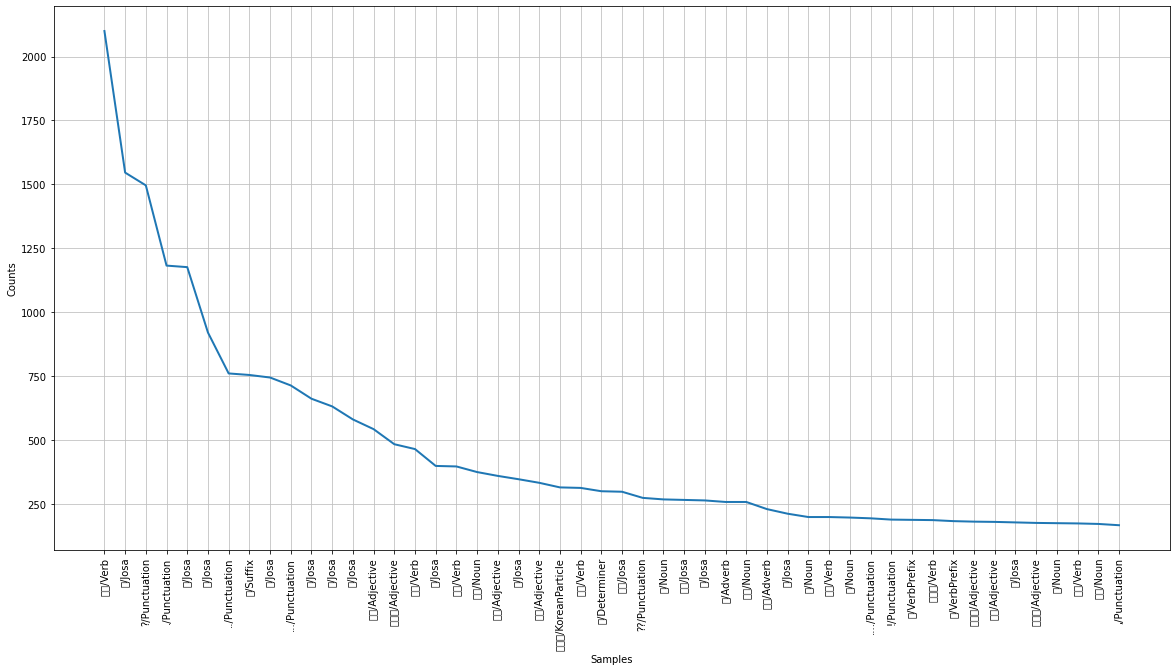

In [42]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
surprise_text.plot(50)

In [43]:
SURPRISE_FREQUENCY_COUNT = 10000;
surprise_selected_words = [f[0] for f in surprise_text.vocab().most_common(SURPRISE_FREQUENCY_COUNT)]

In [44]:
def surprise_term_frequency(doc):
    return [doc.count(word) for word in surprise_selected_words]

In [45]:
x_surprise_train = [surprise_term_frequency(d) for d,_ in train_surprise_docs]
x_surprise_test = [surprise_term_frequency(d) for d,_ in test_surprise_docs]
y_surprise_train = [c for _,c in train_surprise_docs]
y_surprise_test = [c for _,c in test_surprise_docs]

In [46]:
import numpy as np
x_surprise_train = np.asarray(x_surprise_train).astype('float32')
x_surprise_test = np.asarray(x_surprise_test). astype('float32')

y_surprise_train = np.asarray(y_surprise_train).astype('float32')
y_surprise_test = np.asarray(y_surprise_test).astype('float32')

In [47]:
import tensorflow as tf
surprise_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(SURPRISE_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [48]:
surprise_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [51]:
surprise_model.fit(x_surprise_train, y_surprise_train, epochs=5000, batch_size=512)

Epoch 1/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.4443e-04 - binary_accuracy: 0.9996
Epoch 2/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.4376e-04 - binary_accuracy: 0.9998
Epoch 3/5000
17/17 [==============================] - 0s 25ms/step - loss: 3.4748e-04 - binary_accuracy: 0.9996
Epoch 4/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3927e-04 - binary_accuracy: 0.9996
Epoch 5/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.4085e-04 - binary_accuracy: 0.9996
Epoch 6/5000
17/17 [==============================] - 0s 25ms/step - loss: 3.4091e-04 - binary_accuracy: 0.9996
Epoch 7/5000
17/17 [==============================] - 0s 25ms/step - loss: 3.4069e-04 - binary_accuracy: 0.9996
Epoch 8/5000
17/17 [==============================] - 0s 24ms/step - loss: 3.4165e-04 - binary_accuracy: 0.9998
Epoch 9/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.4068e-04 - binary_accuracy:

17/17 [==============================] - 0s 29ms/step - loss: 3.4327e-04 - binary_accuracy: 0.9998
Epoch 145/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.4024e-04 - binary_accuracy: 0.9996
Epoch 146/5000
17/17 [==============================] - 0s 23ms/step - loss: 3.3990e-04 - binary_accuracy: 0.9996
Epoch 147/5000
17/17 [==============================] - 1s 30ms/step - loss: 3.4047e-04 - binary_accuracy: 0.9998
Epoch 148/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.4060e-04 - binary_accuracy: 0.9998
Epoch 149/5000
17/17 [==============================] - 1s 30ms/step - loss: 3.4123e-04 - binary_accuracy: 0.9998
Epoch 150/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.4005e-04 - binary_accuracy: 0.9998
Epoch 151/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.4024e-04 - binary_accuracy: 0.9998
Epoch 152/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3893e-04 - binary_accura

17/17 [==============================] - 0s 24ms/step - loss: 3.3854e-04 - binary_accuracy: 0.9996
Epoch 216/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3997e-04 - binary_accuracy: 0.9995
Epoch 217/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.4061e-04 - binary_accuracy: 0.9998
Epoch 218/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.4239e-04 - binary_accuracy: 0.9995
Epoch 219/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.4022e-04 - binary_accuracy: 0.9998
Epoch 220/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.4273e-04 - binary_accuracy: 0.9998
Epoch 221/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.4068e-04 - binary_accuracy: 0.9998
Epoch 222/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.4008e-04 - binary_accuracy: 0.9996
Epoch 223/5000
17/17 [==============================] - 0s 25ms/step - loss: 3.3869e-04 - binary_accura

17/17 [==============================] - 0s 25ms/step - loss: 3.4112e-04 - binary_accuracy: 0.9998
Epoch 353/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.4009e-04 - binary_accuracy: 0.9998
Epoch 354/5000
17/17 [==============================] - 1s 30ms/step - loss: 3.4084e-04 - binary_accuracy: 0.9998
Epoch 355/5000
17/17 [==============================] - 1s 30ms/step - loss: 3.4008e-04 - binary_accuracy: 0.9998
Epoch 356/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.3871e-04 - binary_accuracy: 0.9998
Epoch 357/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.4117e-04 - binary_accuracy: 0.9996
Epoch 358/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.4020e-04 - binary_accuracy: 0.9998
Epoch 359/5000
17/17 [==============================] - 0s 22ms/step - loss: 3.3979e-04 - binary_accuracy: 0.9998
Epoch 360/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3831e-04 - binary_accura

17/17 [==============================] - 0s 29ms/step - loss: 3.3886e-04 - binary_accuracy: 0.9998
Epoch 495/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.4100e-04 - binary_accuracy: 0.9996
Epoch 496/5000
17/17 [==============================] - 0s 24ms/step - loss: 3.4059e-04 - binary_accuracy: 0.9995
Epoch 497/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.4010e-04 - binary_accuracy: 0.9996
Epoch 498/5000
17/17 [==============================] - 1s 30ms/step - loss: 3.4007e-04 - binary_accuracy: 0.9996
Epoch 499/5000
17/17 [==============================] - 1s 29ms/step - loss: 3.3873e-04 - binary_accuracy: 0.9996
Epoch 500/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.4133e-04 - binary_accuracy: 0.9995
Epoch 501/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.4031e-04 - binary_accuracy: 0.9998
Epoch 502/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.4039e-04 - binary_accura

17/17 [==============================] - 0s 28ms/step - loss: 3.3717e-04 - binary_accuracy: 0.9998
Epoch 636/5000
17/17 [==============================] - 1s 30ms/step - loss: 3.3786e-04 - binary_accuracy: 0.9998
Epoch 637/5000
17/17 [==============================] - 1s 30ms/step - loss: 3.4355e-04 - binary_accuracy: 0.9998
Epoch 638/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.4259e-04 - binary_accuracy: 0.9998
Epoch 639/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.3766e-04 - binary_accuracy: 0.9998
Epoch 640/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.4113e-04 - binary_accuracy: 0.9998
Epoch 641/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.4358e-04 - binary_accuracy: 0.9996
Epoch 642/5000
17/17 [==============================] - 0s 25ms/step - loss: 3.4046e-04 - binary_accuracy: 0.9996
Epoch 643/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.4310e-04 - binary_accura

17/17 [==============================] - 0s 29ms/step - loss: 3.3994e-04 - binary_accuracy: 0.9998
Epoch 776/5000
17/17 [==============================] - 1s 30ms/step - loss: 3.3967e-04 - binary_accuracy: 0.9996
Epoch 777/5000
17/17 [==============================] - 1s 30ms/step - loss: 3.4017e-04 - binary_accuracy: 0.9996
Epoch 778/5000
17/17 [==============================] - 0s 25ms/step - loss: 3.3963e-04 - binary_accuracy: 0.9996
Epoch 779/5000
17/17 [==============================] - 0s 25ms/step - loss: 3.3991e-04 - binary_accuracy: 0.9995
Epoch 780/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.4274e-04 - binary_accuracy: 0.9996
Epoch 781/5000
17/17 [==============================] - 1s 30ms/step - loss: 3.3914e-04 - binary_accuracy: 0.9996
Epoch 782/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.3791e-04 - binary_accuracy: 0.9996
Epoch 783/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.4011e-04 - binary_accura

17/17 [==============================] - 0s 28ms/step - loss: 3.3765e-04 - binary_accuracy: 0.9998
Epoch 918/5000
17/17 [==============================] - 1s 30ms/step - loss: 3.3842e-04 - binary_accuracy: 0.9996
Epoch 919/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.4050e-04 - binary_accuracy: 0.9996
Epoch 920/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.3686e-04 - binary_accuracy: 0.9996
Epoch 921/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.4029e-04 - binary_accuracy: 0.9998
Epoch 922/5000
17/17 [==============================] - 0s 25ms/step - loss: 3.3953e-04 - binary_accuracy: 0.9998
Epoch 923/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.4211e-04 - binary_accuracy: 0.9995
Epoch 924/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.3927e-04 - binary_accuracy: 0.9998
Epoch 925/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.3814e-04 - binary_accura

17/17 [==============================] - 0s 27ms/step - loss: 3.3904e-04 - binary_accuracy: 0.9998
Epoch 1059/5000
17/17 [==============================] - 0s 24ms/step - loss: 3.3908e-04 - binary_accuracy: 0.9998
Epoch 1060/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3763e-04 - binary_accuracy: 0.9998
Epoch 1061/5000
17/17 [==============================] - 1s 30ms/step - loss: 3.4192e-04 - binary_accuracy: 0.9996
Epoch 1062/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.3905e-04 - binary_accuracy: 0.9995
Epoch 1063/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.3745e-04 - binary_accuracy: 0.9996
Epoch 1064/5000
17/17 [==============================] - 1s 30ms/step - loss: 3.3782e-04 - binary_accuracy: 0.9996
Epoch 1065/5000
17/17 [==============================] - 1s 30ms/step - loss: 3.4023e-04 - binary_accuracy: 0.9995
Epoch 1066/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3955e-04 - binar

17/17 [==============================] - 1s 30ms/step - loss: 3.3754e-04 - binary_accuracy: 0.9998
Epoch 1200/5000
17/17 [==============================] - 1s 30ms/step - loss: 3.4127e-04 - binary_accuracy: 0.9996
Epoch 1201/5000
17/17 [==============================] - 1s 30ms/step - loss: 3.3886e-04 - binary_accuracy: 0.9996
Epoch 1202/5000
17/17 [==============================] - 0s 24ms/step - loss: 3.3861e-04 - binary_accuracy: 0.9998
Epoch 1203/5000
17/17 [==============================] - 0s 25ms/step - loss: 3.3680e-04 - binary_accuracy: 0.9998
Epoch 1204/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.4335e-04 - binary_accuracy: 0.9998
Epoch 1205/5000
17/17 [==============================] - 1s 30ms/step - loss: 3.4132e-04 - binary_accuracy: 0.9996
Epoch 1206/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.4040e-04 - binary_accuracy: 0.9998
Epoch 1207/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.4142e-04 - binar

17/17 [==============================] - 1s 30ms/step - loss: 3.4029e-04 - binary_accuracy: 0.9996
Epoch 1340/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.3758e-04 - binary_accuracy: 0.9998
Epoch 1341/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.3936e-04 - binary_accuracy: 0.9998
Epoch 1342/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.3933e-04 - binary_accuracy: 0.9998
Epoch 1343/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.4042e-04 - binary_accuracy: 0.9998
Epoch 1344/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.3859e-04 - binary_accuracy: 0.9998: 0s - loss: 8.2138e-04 - binary_accuracy: 
Epoch 1345/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.4112e-04 - binary_accuracy: 0.9998
Epoch 1346/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.4039e-04 - binary_accuracy: 0.9996
Epoch 1347/5000
17/17 [==============================

17/17 [==============================] - 1s 31ms/step - loss: 3.4497e-04 - binary_accuracy: 0.9998
Epoch 1481/5000
17/17 [==============================] - 1s 30ms/step - loss: 3.4401e-04 - binary_accuracy: 0.9996
Epoch 1482/5000
17/17 [==============================] - 1s 30ms/step - loss: 3.4476e-04 - binary_accuracy: 0.9998
Epoch 1483/5000
17/17 [==============================] - 1s 31ms/step - loss: 3.4215e-04 - binary_accuracy: 0.9996
Epoch 1484/5000
17/17 [==============================] - 1s 29ms/step - loss: 3.3979e-04 - binary_accuracy: 0.9998
Epoch 1485/5000
17/17 [==============================] - 1s 31ms/step - loss: 3.4141e-04 - binary_accuracy: 0.9996
Epoch 1486/5000
17/17 [==============================] - 1s 31ms/step - loss: 3.3891e-04 - binary_accuracy: 0.9996
Epoch 1487/5000
17/17 [==============================] - 1s 31ms/step - loss: 3.4034e-04 - binary_accuracy: 0.9998
Epoch 1488/5000
17/17 [==============================] - 1s 30ms/step - loss: 3.3877e-04 - binar

Epoch 1551/5000
17/17 [==============================] - 1s 29ms/step - loss: 3.3597e-04 - binary_accuracy: 0.9998
Epoch 1552/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.3890e-04 - binary_accuracy: 0.9998
Epoch 1553/5000
17/17 [==============================] - 1s 30ms/step - loss: 3.4003e-04 - binary_accuracy: 0.9998
Epoch 1554/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.4052e-04 - binary_accuracy: 0.9996
Epoch 1555/5000
17/17 [==============================] - 0s 22ms/step - loss: 3.4072e-04 - binary_accuracy: 0.9998
Epoch 1556/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.3992e-04 - binary_accuracy: 0.9998
Epoch 1557/5000
17/17 [==============================] - 1s 30ms/step - loss: 3.4003e-04 - binary_accuracy: 0.9998
Epoch 1558/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.4037e-04 - binary_accuracy: 0.9996
Epoch 1559/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.

17/17 [==============================] - 0s 28ms/step - loss: 3.4172e-04 - binary_accuracy: 0.9996
Epoch 1693/5000
17/17 [==============================] - 1s 30ms/step - loss: 3.4083e-04 - binary_accuracy: 0.9995
Epoch 1694/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.4209e-04 - binary_accuracy: 0.9998
Epoch 1695/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.3879e-04 - binary_accuracy: 0.9996
Epoch 1696/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.4144e-04 - binary_accuracy: 0.9995
Epoch 1697/5000
17/17 [==============================] - 1s 30ms/step - loss: 3.4077e-04 - binary_accuracy: 0.9995
Epoch 1698/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.4033e-04 - binary_accuracy: 0.9996
Epoch 1699/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.4030e-04 - binary_accuracy: 0.9996
Epoch 1700/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.4093e-04 - binar

17/17 [==============================] - 0s 28ms/step - loss: 3.4084e-04 - binary_accuracy: 0.9998
Epoch 1834/5000
17/17 [==============================] - 0s 23ms/step - loss: 3.3818e-04 - binary_accuracy: 0.9998
Epoch 1835/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.3739e-04 - binary_accuracy: 0.9998
Epoch 1836/5000
17/17 [==============================] - 1s 30ms/step - loss: 3.4081e-04 - binary_accuracy: 0.9998
Epoch 1837/5000
17/17 [==============================] - 1s 31ms/step - loss: 3.3870e-04 - binary_accuracy: 0.9998
Epoch 1838/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.3919e-04 - binary_accuracy: 0.9998
Epoch 1839/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3947e-04 - binary_accuracy: 0.9996
Epoch 1840/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.3926e-04 - binary_accuracy: 0.9996
Epoch 1841/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.3717e-04 - binar

17/17 [==============================] - 1s 29ms/step - loss: 3.3871e-04 - binary_accuracy: 0.9998
Epoch 1974/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.3946e-04 - binary_accuracy: 0.9998
Epoch 1975/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.4102e-04 - binary_accuracy: 0.9996
Epoch 1976/5000
17/17 [==============================] - 0s 24ms/step - loss: 3.3716e-04 - binary_accuracy: 0.9998
Epoch 1977/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.4071e-04 - binary_accuracy: 0.9998
Epoch 1978/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.3890e-04 - binary_accuracy: 0.9995
Epoch 1979/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.3885e-04 - binary_accuracy: 0.9998
Epoch 1980/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.3871e-04 - binary_accuracy: 0.9996
Epoch 1981/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.3883e-04 - binar

17/17 [==============================] - 0s 28ms/step - loss: 3.3940e-04 - binary_accuracy: 0.9996
Epoch 2114/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3973e-04 - binary_accuracy: 0.9995
Epoch 2115/5000
17/17 [==============================] - 0s 25ms/step - loss: 3.4017e-04 - binary_accuracy: 0.9995
Epoch 2116/5000
17/17 [==============================] - 0s 25ms/step - loss: 3.3733e-04 - binary_accuracy: 0.9998
Epoch 2117/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.4033e-04 - binary_accuracy: 0.9998
Epoch 2118/5000
17/17 [==============================] - 0s 24ms/step - loss: 3.3861e-04 - binary_accuracy: 0.9998
Epoch 2119/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3844e-04 - binary_accuracy: 0.9998
Epoch 2120/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.4017e-04 - binary_accuracy: 0.9996
Epoch 2121/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.3905e-04 - binar

Epoch 2253/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3883e-04 - binary_accuracy: 0.9996
Epoch 2254/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3858e-04 - binary_accuracy: 0.9998
Epoch 2255/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3856e-04 - binary_accuracy: 0.9996
Epoch 2256/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3723e-04 - binary_accuracy: 0.9998
Epoch 2257/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3779e-04 - binary_accuracy: 0.9998
Epoch 2258/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.3833e-04 - binary_accuracy: 0.9998
Epoch 2259/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.3852e-04 - binary_accuracy: 0.9996
Epoch 2260/5000
17/17 [==============================] - 1s 30ms/step - loss: 3.3728e-04 - binary_accuracy: 0.9998
Epoch 2261/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.

17/17 [==============================] - 0s 24ms/step - loss: 3.3842e-04 - binary_accuracy: 0.9996
Epoch 2324/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.3928e-04 - binary_accuracy: 0.9998
Epoch 2325/5000
17/17 [==============================] - 1s 29ms/step - loss: 3.3737e-04 - binary_accuracy: 0.9996
Epoch 2326/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.3693e-04 - binary_accuracy: 0.9998
Epoch 2327/5000
17/17 [==============================] - 1s 30ms/step - loss: 3.3881e-04 - binary_accuracy: 0.9998
Epoch 2328/5000
17/17 [==============================] - 0s 29ms/step - loss: 3.3861e-04 - binary_accuracy: 0.9998
Epoch 2329/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.4047e-04 - binary_accuracy: 0.9998
Epoch 2330/5000
17/17 [==============================] - 0s 21ms/step - loss: 3.4136e-04 - binary_accuracy: 0.9998
Epoch 2331/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.3776e-04 - binar

17/17 [==============================] - 0s 27ms/step - loss: 3.3934e-04 - binary_accuracy: 0.9995
Epoch 2465/5000
17/17 [==============================] - 0s 25ms/step - loss: 3.3976e-04 - binary_accuracy: 0.9998
Epoch 2466/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3710e-04 - binary_accuracy: 0.9998
Epoch 2467/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3730e-04 - binary_accuracy: 0.9998
Epoch 2468/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3946e-04 - binary_accuracy: 0.9998
Epoch 2469/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3917e-04 - binary_accuracy: 0.9996
Epoch 2470/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3929e-04 - binary_accuracy: 0.9995
Epoch 2471/5000
17/17 [==============================] - 0s 25ms/step - loss: 3.3895e-04 - binary_accuracy: 0.9996
Epoch 2472/5000
17/17 [==============================] - 0s 25ms/step - loss: 3.3875e-04 - binar

17/17 [==============================] - 0s 28ms/step - loss: 3.3862e-04 - binary_accuracy: 0.9996
Epoch 2606/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3916e-04 - binary_accuracy: 0.9996
Epoch 2607/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.3794e-04 - binary_accuracy: 0.9996
Epoch 2608/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3928e-04 - binary_accuracy: 0.9996
Epoch 2609/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3895e-04 - binary_accuracy: 0.9996
Epoch 2610/5000
17/17 [==============================] - 0s 23ms/step - loss: 3.3699e-04 - binary_accuracy: 0.9998
Epoch 2611/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3907e-04 - binary_accuracy: 0.9996
Epoch 2612/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3845e-04 - binary_accuracy: 0.9996
Epoch 2613/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.3863e-04 - binar

Epoch 2676/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3831e-04 - binary_accuracy: 0.9995
Epoch 2677/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3847e-04 - binary_accuracy: 0.9998
Epoch 2678/5000
17/17 [==============================] - 0s 23ms/step - loss: 3.3729e-04 - binary_accuracy: 0.9996
Epoch 2679/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3845e-04 - binary_accuracy: 0.9995
Epoch 2680/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3709e-04 - binary_accuracy: 0.9996
Epoch 2681/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.3725e-04 - binary_accuracy: 0.9998
Epoch 2682/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3854e-04 - binary_accuracy: 0.9995
Epoch 2683/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3732e-04 - binary_accuracy: 0.9996
Epoch 2684/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.

17/17 [==============================] - 0s 23ms/step - loss: 3.3915e-04 - binary_accuracy: 0.9995
Epoch 2818/5000
17/17 [==============================] - 0s 25ms/step - loss: 3.3959e-04 - binary_accuracy: 0.9998
Epoch 2819/5000
17/17 [==============================] - 0s 24ms/step - loss: 3.3947e-04 - binary_accuracy: 0.9998
Epoch 2820/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.4045e-04 - binary_accuracy: 0.9998
Epoch 2821/5000
17/17 [==============================] - 0s 24ms/step - loss: 3.3969e-04 - binary_accuracy: 0.9998
Epoch 2822/5000
17/17 [==============================] - 0s 24ms/step - loss: 3.3958e-04 - binary_accuracy: 0.9996
Epoch 2823/5000
17/17 [==============================] - 0s 23ms/step - loss: 3.3900e-04 - binary_accuracy: 0.9996
Epoch 2824/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.4017e-04 - binary_accuracy: 0.9996
Epoch 2825/5000
17/17 [==============================] - 0s 25ms/step - loss: 3.3987e-04 - binar

Epoch 2959/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3729e-04 - binary_accuracy: 0.9996
Epoch 2960/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3806e-04 - binary_accuracy: 0.9996
Epoch 2961/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3810e-04 - binary_accuracy: 0.9996: 0s - loss: 2.7185e-04 - binary_accuracy: 0.999
Epoch 2962/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3609e-04 - binary_accuracy: 0.9998
Epoch 2963/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3698e-04 - binary_accuracy: 0.9996
Epoch 2964/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3791e-04 - binary_accuracy: 0.9998
Epoch 2965/5000
17/17 [==============================] - 0s 25ms/step - loss: 3.3841e-04 - binary_accuracy: 0.9996
Epoch 2966/5000
17/17 [==============================] - 0s 24ms/step - loss: 3.3824e-04 - binary_accuracy: 0.9998
Epoch 2967/5000
17/17 [=========

17/17 [==============================] - 0s 26ms/step - loss: 3.3838e-04 - binary_accuracy: 0.9998
Epoch 3100/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3798e-04 - binary_accuracy: 0.9996
Epoch 3101/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3584e-04 - binary_accuracy: 0.9998
Epoch 3102/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3852e-04 - binary_accuracy: 0.9995
Epoch 3103/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3781e-04 - binary_accuracy: 0.9998
Epoch 3104/5000
17/17 [==============================] - 0s 23ms/step - loss: 3.3771e-04 - binary_accuracy: 0.9996
Epoch 3105/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3814e-04 - binary_accuracy: 0.9995
Epoch 3106/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3783e-04 - binary_accuracy: 0.9996
Epoch 3107/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3785e-04 - binar

17/17 [==============================] - 0s 27ms/step - loss: 3.3894e-04 - binary_accuracy: 0.9998
Epoch 3241/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3909e-04 - binary_accuracy: 0.9996
Epoch 3242/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3852e-04 - binary_accuracy: 0.9998
Epoch 3243/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3991e-04 - binary_accuracy: 0.9996: 0s - loss: 3.6540e-04 - binary_accuracy: 0.999
Epoch 3244/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3710e-04 - binary_accuracy: 0.9996
Epoch 3245/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3987e-04 - binary_accuracy: 0.9996: 0s - loss: 4.4005e-04 - binary_accuracy:
Epoch 3246/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3953e-04 - binary_accuracy: 0.9996: 0s - loss: 5.3615e-04 - binary_accuracy: 
Epoch 3247/5000
17/17 [==============================] - 0s 27ms/step - loss: 

Epoch 3381/5000
17/17 [==============================] - 0s 24ms/step - loss: 3.3781e-04 - binary_accuracy: 0.9998
Epoch 3382/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3717e-04 - binary_accuracy: 0.9998
Epoch 3383/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3732e-04 - binary_accuracy: 0.9996
Epoch 3384/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3826e-04 - binary_accuracy: 0.9996
Epoch 3385/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3796e-04 - binary_accuracy: 0.9998
Epoch 3386/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.3812e-04 - binary_accuracy: 0.9996
Epoch 3387/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.3694e-04 - binary_accuracy: 0.9998
Epoch 3388/5000
17/17 [==============================] - 0s 25ms/step - loss: 3.3913e-04 - binary_accuracy: 0.9995
Epoch 3389/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.

17/17 [==============================] - 0s 26ms/step - loss: 3.3666e-04 - binary_accuracy: 0.9998
Epoch 3523/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3709e-04 - binary_accuracy: 0.9996
Epoch 3524/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3836e-04 - binary_accuracy: 0.9996
Epoch 3525/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3789e-04 - binary_accuracy: 0.9998
Epoch 3526/5000
17/17 [==============================] - 0s 25ms/step - loss: 3.3679e-04 - binary_accuracy: 0.9998
Epoch 3527/5000
17/17 [==============================] - 0s 25ms/step - loss: 3.3784e-04 - binary_accuracy: 0.9998
Epoch 3528/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3695e-04 - binary_accuracy: 0.9996
Epoch 3529/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3709e-04 - binary_accuracy: 0.9998: 0s - loss: 4.5296e-04 - binary_accuracy: 0.9
Epoch 3530/5000
17/17 [===========================

17/17 [==============================] - 0s 26ms/step - loss: 3.3763e-04 - binary_accuracy: 0.9998
Epoch 3663/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3767e-04 - binary_accuracy: 0.9998
Epoch 3664/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3768e-04 - binary_accuracy: 0.9998
Epoch 3665/5000
17/17 [==============================] - 0s 24ms/step - loss: 3.3784e-04 - binary_accuracy: 0.9998
Epoch 3666/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3777e-04 - binary_accuracy: 0.9998
Epoch 3667/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3684e-04 - binary_accuracy: 0.9998
Epoch 3668/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3773e-04 - binary_accuracy: 0.9998: 0s - loss: 2.4762e-04 - binary_accuracy: 0.9
Epoch 3669/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3737e-04 - binary_accuracy: 0.9998
Epoch 3670/5000
17/17 [===========================

17/17 [==============================] - 0s 27ms/step - loss: 3.3815e-04 - binary_accuracy: 0.9998
Epoch 3733/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.3805e-04 - binary_accuracy: 0.9998
Epoch 3734/5000
17/17 [==============================] - 0s 25ms/step - loss: 3.3695e-04 - binary_accuracy: 0.9998
Epoch 3735/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3741e-04 - binary_accuracy: 0.9998
Epoch 3736/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3816e-04 - binary_accuracy: 0.9998
Epoch 3737/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3806e-04 - binary_accuracy: 0.9998
Epoch 3738/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3778e-04 - binary_accuracy: 0.9998
Epoch 3739/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.3708e-04 - binary_accuracy: 0.9998
Epoch 3740/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3811e-04 - binar

Epoch 3873/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3781e-04 - binary_accuracy: 0.9996
Epoch 3874/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3743e-04 - binary_accuracy: 0.9996
Epoch 3875/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3731e-04 - binary_accuracy: 0.9995
Epoch 3876/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.3678e-04 - binary_accuracy: 0.9996
Epoch 3877/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3761e-04 - binary_accuracy: 0.9998
Epoch 3878/5000
17/17 [==============================] - 0s 25ms/step - loss: 3.3736e-04 - binary_accuracy: 0.9995
Epoch 3879/5000
17/17 [==============================] - 0s 26ms/step - loss: 3.3680e-04 - binary_accuracy: 0.9998
Epoch 3880/5000
17/17 [==============================] - 0s 28ms/step - loss: 3.3756e-04 - binary_accuracy: 0.9998
Epoch 3881/5000
17/17 [==============================] - 0s 27ms/step - loss: 3.

Epoch 4014/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3685e-04 - binary_accuracy: 0.9998
Epoch 4015/5000
17/17 [==============================] - 0s 21ms/step - loss: 3.3886e-04 - binary_accuracy: 0.9998
Epoch 4016/5000
17/17 [==============================] - 0s 21ms/step - loss: 3.3759e-04 - binary_accuracy: 0.9998
Epoch 4017/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3763e-04 - binary_accuracy: 0.9998
Epoch 4018/5000
17/17 [==============================] - 0s 23ms/step - loss: 3.3759e-04 - binary_accuracy: 0.9998
Epoch 4019/5000
17/17 [==============================] - 0s 22ms/step - loss: 3.3760e-04 - binary_accuracy: 0.9998
Epoch 4020/5000
17/17 [==============================] - 0s 21ms/step - loss: 3.3750e-04 - binary_accuracy: 0.9998
Epoch 4021/5000
17/17 [==============================] - 0s 21ms/step - loss: 3.3769e-04 - binary_accuracy: 0.9998
Epoch 4022/5000
17/17 [==============================] - 0s 21ms/step - loss: 3.

17/17 [==============================] - 0s 20ms/step - loss: 3.3728e-04 - binary_accuracy: 0.9998
Epoch 4157/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3812e-04 - binary_accuracy: 0.9998
Epoch 4158/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3837e-04 - binary_accuracy: 0.9998
Epoch 4159/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3714e-04 - binary_accuracy: 0.9998
Epoch 4160/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3834e-04 - binary_accuracy: 0.9996
Epoch 4161/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3845e-04 - binary_accuracy: 0.9996
Epoch 4162/5000
17/17 [==============================] - 0s 21ms/step - loss: 3.3738e-04 - binary_accuracy: 0.9996
Epoch 4163/5000
17/17 [==============================] - 0s 22ms/step - loss: 3.3824e-04 - binary_accuracy: 0.9998
Epoch 4164/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3782e-04 - binar

17/17 [==============================] - 0s 22ms/step - loss: 3.3719e-04 - binary_accuracy: 0.9995
Epoch 4299/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3726e-04 - binary_accuracy: 0.9996
Epoch 4300/5000
17/17 [==============================] - 0s 21ms/step - loss: 3.3795e-04 - binary_accuracy: 0.9996
Epoch 4301/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3642e-04 - binary_accuracy: 0.9996
Epoch 4302/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3724e-04 - binary_accuracy: 0.9996
Epoch 4303/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3678e-04 - binary_accuracy: 0.9996
Epoch 4304/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3746e-04 - binary_accuracy: 0.9996
Epoch 4305/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3628e-04 - binary_accuracy: 0.9998
Epoch 4306/5000
17/17 [==============================] - 0s 21ms/step - loss: 3.3695e-04 - binar

17/17 [==============================] - 0s 21ms/step - loss: 3.3766e-04 - binary_accuracy: 0.9996
Epoch 4441/5000
17/17 [==============================] - 0s 23ms/step - loss: 3.3739e-04 - binary_accuracy: 0.9996
Epoch 4442/5000
17/17 [==============================] - 0s 21ms/step - loss: 3.3736e-04 - binary_accuracy: 0.9995
Epoch 4443/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3750e-04 - binary_accuracy: 0.9996
Epoch 4444/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3754e-04 - binary_accuracy: 0.9998
Epoch 4445/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3672e-04 - binary_accuracy: 0.9998
Epoch 4446/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3767e-04 - binary_accuracy: 0.9998
Epoch 4447/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3680e-04 - binary_accuracy: 0.9996
Epoch 4448/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3662e-04 - binar

17/17 [==============================] - 0s 20ms/step - loss: 3.3660e-04 - binary_accuracy: 0.9998
Epoch 4583/5000
17/17 [==============================] - 0s 22ms/step - loss: 3.3702e-04 - binary_accuracy: 0.9998
Epoch 4584/5000
17/17 [==============================] - 0s 22ms/step - loss: 3.3714e-04 - binary_accuracy: 0.9998
Epoch 4585/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3706e-04 - binary_accuracy: 0.9998
Epoch 4586/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3707e-04 - binary_accuracy: 0.9998
Epoch 4587/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3715e-04 - binary_accuracy: 0.9998
Epoch 4588/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3716e-04 - binary_accuracy: 0.9998
Epoch 4589/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3655e-04 - binary_accuracy: 0.9998
Epoch 4590/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3738e-04 - binar

Epoch 4653/5000
17/17 [==============================] - 0s 21ms/step - loss: 3.3707e-04 - binary_accuracy: 0.9998
Epoch 4654/5000
17/17 [==============================] - 0s 21ms/step - loss: 3.3696e-04 - binary_accuracy: 0.9998
Epoch 4655/5000
17/17 [==============================] - 0s 21ms/step - loss: 3.3730e-04 - binary_accuracy: 0.9998
Epoch 4656/5000
17/17 [==============================] - 0s 21ms/step - loss: 3.3699e-04 - binary_accuracy: 0.9998
Epoch 4657/5000
17/17 [==============================] - 0s 21ms/step - loss: 3.3655e-04 - binary_accuracy: 0.9998
Epoch 4658/5000
17/17 [==============================] - 0s 21ms/step - loss: 3.3666e-04 - binary_accuracy: 0.9998
Epoch 4659/5000
17/17 [==============================] - 0s 24ms/step - loss: 3.3737e-04 - binary_accuracy: 0.9998
Epoch 4660/5000
17/17 [==============================] - 0s 23ms/step - loss: 3.3731e-04 - binary_accuracy: 0.9998
Epoch 4661/5000
17/17 [==============================] - 0s 21ms/step - loss: 3.

17/17 [==============================] - 0s 20ms/step - loss: 3.3694e-04 - binary_accuracy: 0.9998
Epoch 4796/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3772e-04 - binary_accuracy: 0.9995
Epoch 4797/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3682e-04 - binary_accuracy: 0.9996
Epoch 4798/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3699e-04 - binary_accuracy: 0.9998
Epoch 4799/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3718e-04 - binary_accuracy: 0.9998
Epoch 4800/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3745e-04 - binary_accuracy: 0.9998
Epoch 4801/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3702e-04 - binary_accuracy: 0.9998
Epoch 4802/5000
17/17 [==============================] - 0s 22ms/step - loss: 3.3714e-04 - binary_accuracy: 0.9998
Epoch 4803/5000
17/17 [==============================] - 0s 21ms/step - loss: 3.3658e-04 - binar

17/17 [==============================] - 0s 21ms/step - loss: 3.3655e-04 - binary_accuracy: 0.9998
Epoch 4938/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3703e-04 - binary_accuracy: 0.9998
Epoch 4939/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3705e-04 - binary_accuracy: 0.9998
Epoch 4940/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3695e-04 - binary_accuracy: 0.9998
Epoch 4941/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3653e-04 - binary_accuracy: 0.9998
Epoch 4942/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3705e-04 - binary_accuracy: 0.9998
Epoch 4943/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3703e-04 - binary_accuracy: 0.9998
Epoch 4944/5000
17/17 [==============================] - 0s 20ms/step - loss: 3.3744e-04 - binary_accuracy: 0.9998
Epoch 4945/5000
17/17 [==============================] - 0s 23ms/step - loss: 3.3682e-04 - binar

In [54]:
surprise_results = surprise_model.evaluate(x_surprise_test, y_surprise_test)

111/111 [==============================] - 0s 2ms/step - loss: 5.3757 - binary_accuracy: 0.6716


In [55]:
surprise_results

[5.3756585121154785, 0.6715741753578186]

In [56]:
surprise_model.save('surprise_model.h5')

In [57]:
surprise_review = "너무 놀랍다"
surprise_token = tokenize(surprise_review)
surprise_token

['너무/Adverb', '놀라다/Verb']

In [58]:
tf = surprise_term_frequency(surprise_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(surprise_model.predict(data))

0.9999954700469971

In [59]:
def surprise_predict(predict):
    surprise_token = tokenize(predict)
    surprise_tfq = surprise_term_frequency(surprise_token)
    surprise_data = np.expand_dims(np.asarray(surprise_tfq).astype('float32'), axis=0)
    surprise_score = float(surprise_model.predict(surprise_data))
    if(surprise_score > 0.5):
        print(f"{predict} ==> 놀람 ({round(surprise_score*100)}%)")
    else:
        print(f"{predict} ==> 놀람X ({round((1-surprise_score)*100)}%)")

In [60]:
surprise_predict("원재상")

원재상 ==> 놀람X (100%)


In [61]:
#분노 감정 분석

In [62]:
import pandas as pd
train_anger_df = pd.read_csv("angertraindata.txt","\t")
test_anger_df = pd.read_csv("angertestdata.txt","\t")

In [63]:
from konlpy.tag import Okt
okt_anger = Okt()

In [64]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_anger.pos(doc, norm=True, stem=True)]

In [65]:
train_anger_df.isnull().any()
train_anger_df['document'] = train_anger_df['document'].fillna('');
train_anger_df.isnull().any()
test_anger_df['document'] = test_anger_df['document'].fillna('');

In [66]:
train_anger_docs = [(tokenize(row[1]), row[2]) for row in train_anger_df.values]
test_anger_docs = [(tokenize(row[1]),row[2]) for row in test_anger_df.values]

In [67]:
print(train_anger_docs[0])
print(test_anger_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [68]:
tokens = [t for d in train_anger_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 77355


In [69]:
import nltk
anger_text = nltk.Text(tokens, name='NMSC')
print(len(anger_text.tokens))
print(len(set(anger_text.tokens)))
print(anger_text.vocab().most_common(10))

77355
10887
[('하다/Verb', 2380), ('./Punctuation', 1428), ('이/Josa', 1382), ('들/Suffix', 1197), ('가/Josa', 1008), ('?/Punctuation', 989), ('에/Josa', 967), ('을/Josa', 820), ('은/Josa', 807), ('../Punctuation', 676)]


C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48155 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48124 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50416 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47112 missing from c

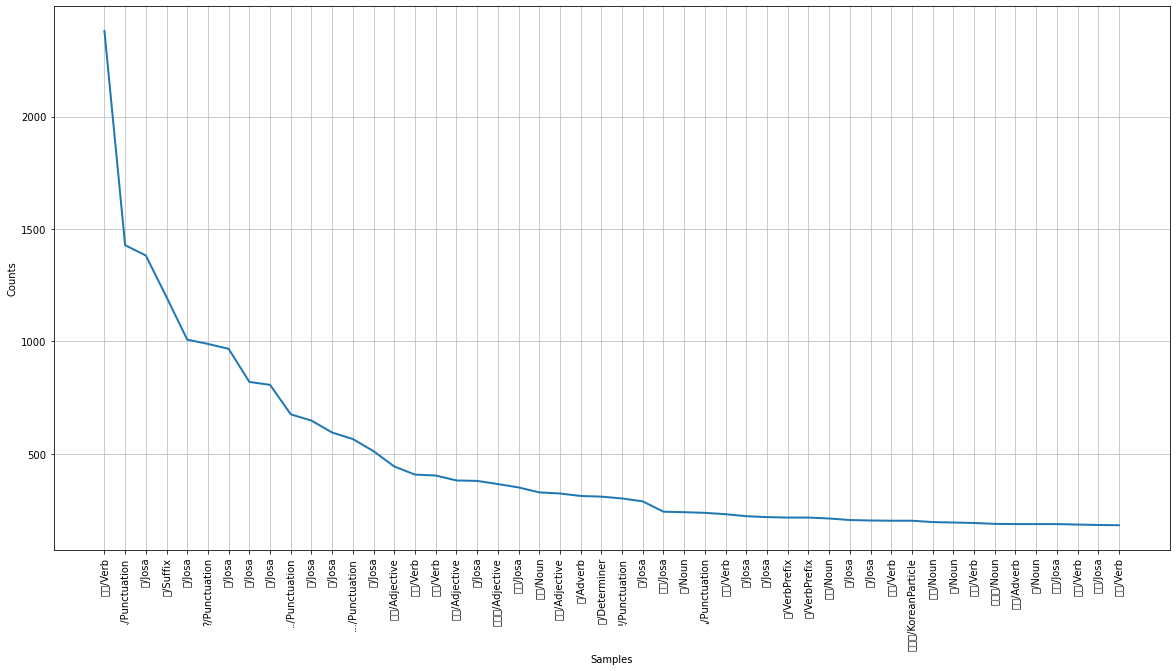

In [70]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
anger_text.plot(50)

In [71]:
ANGER_FREQUENCY_COUNT = 10000;
anger_selected_words = [f[0] for f in anger_text.vocab().most_common(ANGER_FREQUENCY_COUNT)]

In [72]:
def anger_term_frequency(doc):
    return [doc.count(word) for word in anger_selected_words]

In [73]:
x_anger_train = [anger_term_frequency(d) for d,_ in train_anger_docs]
x_anger_test = [anger_term_frequency(d) for d,_ in test_anger_docs]
y_anger_train = [c for _,c in train_anger_docs]
y_anger_test = [c for _,c in test_anger_docs]

In [74]:
import numpy as np
x_anger_train = np.asarray(x_anger_train).astype('float32')
x_anger_test = np.asarray(x_anger_test). astype('float32')

y_anger_train = np.asarray(y_anger_train).astype('float32')
y_anger_test = np.asarray(y_anger_test).astype('float32')

In [75]:
import tensorflow as tf
anger_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(ANGER_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [76]:
anger_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [77]:
anger_model.fit(x_anger_train, y_anger_train, epochs=5000, batch_size=512)

Epoch 1/5000
16/16 [==============================] - 0s 20ms/step - loss: 0.6521 - binary_accuracy: 0.6926
Epoch 2/5000
16/16 [==============================] - 0s 20ms/step - loss: 0.5015 - binary_accuracy: 0.8134
Epoch 3/5000
16/16 [==============================] - 0s 20ms/step - loss: 0.3896 - binary_accuracy: 0.8551
Epoch 4/5000
16/16 [==============================] - 0s 20ms/step - loss: 0.3111 - binary_accuracy: 0.8853
Epoch 5/5000
16/16 [==============================] - 0s 23ms/step - loss: 0.2489 - binary_accuracy: 0.9109
Epoch 6/5000
16/16 [==============================] - 0s 21ms/step - loss: 0.1995 - binary_accuracy: 0.9276
Epoch 7/5000
16/16 [==============================] - 0s 30ms/step - loss: 0.1585 - binary_accuracy: 0.9451
Epoch 8/5000
16/16 [==============================] - 0s 20ms/step - loss: 0.1259 - binary_accuracy: 0.9572
Epoch 9/5000
16/16 [==============================] - 0s 20ms/step - loss: 0.0985 - binary_accuracy: 0.9702
Epoch 10/5000
16/16 [=======

16/16 [==============================] - 0s 22ms/step - loss: 4.8941e-09 - binary_accuracy: 1.0000
Epoch 147/5000
16/16 [==============================] - 0s 20ms/step - loss: 4.8376e-09 - binary_accuracy: 1.0000
Epoch 148/5000
16/16 [==============================] - 0s 20ms/step - loss: 4.7677e-09 - binary_accuracy: 1.0000
Epoch 149/5000
16/16 [==============================] - 0s 20ms/step - loss: 4.7312e-09 - binary_accuracy: 1.0000
Epoch 150/5000
16/16 [==============================] - 0s 20ms/step - loss: 4.7502e-09 - binary_accuracy: 1.0000
Epoch 151/5000
16/16 [==============================] - 0s 20ms/step - loss: 4.6892e-09 - binary_accuracy: 1.0000
Epoch 152/5000
16/16 [==============================] - 0s 20ms/step - loss: 4.6502e-09 - binary_accuracy: 1.0000
Epoch 153/5000
16/16 [==============================] - 0s 20ms/step - loss: 4.6038e-09 - binary_accuracy: 1.0000
Epoch 154/5000
16/16 [==============================] - 0s 20ms/step - loss: 4.6531e-09 - binary_accura

Epoch 218/5000
16/16 [==============================] - 0s 20ms/step - loss: 3.4387e-09 - binary_accuracy: 1.0000
Epoch 219/5000
16/16 [==============================] - 0s 20ms/step - loss: 3.4293e-09 - binary_accuracy: 1.0000
Epoch 220/5000
16/16 [==============================] - 0s 20ms/step - loss: 3.4424e-09 - binary_accuracy: 1.0000
Epoch 221/5000
16/16 [==============================] - 0s 20ms/step - loss: 3.4078e-09 - binary_accuracy: 1.0000
Epoch 222/5000
16/16 [==============================] - 0s 20ms/step - loss: 3.3996e-09 - binary_accuracy: 1.0000
Epoch 223/5000
16/16 [==============================] - 0s 20ms/step - loss: 3.3657e-09 - binary_accuracy: 1.0000
Epoch 224/5000
16/16 [==============================] - 0s 20ms/step - loss: 3.3867e-09 - binary_accuracy: 1.0000
Epoch 225/5000
16/16 [==============================] - 0s 20ms/step - loss: 3.3556e-09 - binary_accuracy: 1.0000
Epoch 226/5000
16/16 [==============================] - 0s 23ms/step - loss: 3.3571e-09 

Epoch 361/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.8019e-09 - binary_accuracy: 1.0000
Epoch 362/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.7865e-09 - binary_accuracy: 1.0000
Epoch 363/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.7869e-09 - binary_accuracy: 1.0000
Epoch 364/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.7773e-09 - binary_accuracy: 1.0000
Epoch 365/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.7725e-09 - binary_accuracy: 1.0000
Epoch 366/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.7907e-09 - binary_accuracy: 1.0000
Epoch 367/5000
16/16 [==============================] - 0s 23ms/step - loss: 2.7816e-09 - binary_accuracy: 1.0000
Epoch 368/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.7690e-09 - binary_accuracy: 1.0000
Epoch 369/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.7755e-09 

Epoch 504/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.6413e-09 - binary_accuracy: 1.0000
Epoch 505/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.6344e-09 - binary_accuracy: 1.0000
Epoch 506/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.6222e-09 - binary_accuracy: 1.0000
Epoch 507/5000
16/16 [==============================] - 0s 24ms/step - loss: 2.6235e-09 - binary_accuracy: 1.0000
Epoch 508/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.6445e-09 - binary_accuracy: 1.0000
Epoch 509/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.6218e-09 - binary_accuracy: 1.0000
Epoch 510/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.6301e-09 - binary_accuracy: 1.0000
Epoch 511/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.6353e-09 - binary_accuracy: 1.0000
Epoch 512/5000
16/16 [==============================] - 0s 23ms/step - loss: 2.6450e-09 

Epoch 647/5000
16/16 [==============================] - 0s 25ms/step - loss: 2.5760e-09 - binary_accuracy: 1.0000
Epoch 648/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.5840e-09 - binary_accuracy: 1.0000
Epoch 649/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5786e-09 - binary_accuracy: 1.0000
Epoch 650/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5827e-09 - binary_accuracy: 1.0000
Epoch 651/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5837e-09 - binary_accuracy: 1.0000
Epoch 652/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5848e-09 - binary_accuracy: 1.0000
Epoch 653/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5967e-09 - binary_accuracy: 1.0000
Epoch 654/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5933e-09 - binary_accuracy: 1.0000
Epoch 655/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5199e-09 

Epoch 790/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5602e-09 - binary_accuracy: 1.0000
Epoch 791/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5808e-09 - binary_accuracy: 1.0000
Epoch 792/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5593e-09 - binary_accuracy: 1.0000
Epoch 793/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5222e-09 - binary_accuracy: 1.0000
Epoch 794/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5389e-09 - binary_accuracy: 1.0000
Epoch 795/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5723e-09 - binary_accuracy: 1.0000
Epoch 796/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5570e-09 - binary_accuracy: 1.0000
Epoch 797/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.5655e-09 - binary_accuracy: 1.0000
Epoch 798/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5525e-09 

Epoch 933/5000
16/16 [==============================] - 0s 23ms/step - loss: 2.5598e-09 - binary_accuracy: 1.0000
Epoch 934/5000
16/16 [==============================] - 0s 24ms/step - loss: 2.5593e-09 - binary_accuracy: 1.0000
Epoch 935/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.5144e-09 - binary_accuracy: 1.0000
Epoch 936/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5536e-09 - binary_accuracy: 1.0000
Epoch 937/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.4645e-09 - binary_accuracy: 1.0000
Epoch 938/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5470e-09 - binary_accuracy: 1.0000
Epoch 939/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5471e-09 - binary_accuracy: 1.0000
Epoch 940/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5130e-09 - binary_accuracy: 1.0000
Epoch 941/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.5449e-09 

16/16 [==============================] - 0s 21ms/step - loss: 2.5406e-09 - binary_accuracy: 1.0000
Epoch 1076/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5577e-09 - binary_accuracy: 1.0000
Epoch 1077/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5541e-09 - binary_accuracy: 1.0000
Epoch 1078/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5374e-09 - binary_accuracy: 1.0000
Epoch 1079/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5585e-09 - binary_accuracy: 1.0000
Epoch 1080/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5428e-09 - binary_accuracy: 1.0000
Epoch 1081/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5473e-09 - binary_accuracy: 1.0000
Epoch 1082/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5509e-09 - binary_accuracy: 1.0000
Epoch 1083/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.4860e-09 - binar

16/16 [==============================] - 0s 20ms/step - loss: 2.5325e-09 - binary_accuracy: 1.0000
Epoch 1218/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5454e-09 - binary_accuracy: 1.0000
Epoch 1219/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5531e-09 - binary_accuracy: 1.0000
Epoch 1220/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5193e-09 - binary_accuracy: 1.0000
Epoch 1221/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5518e-09 - binary_accuracy: 1.0000
Epoch 1222/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5578e-09 - binary_accuracy: 1.0000
Epoch 1223/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5649e-09 - binary_accuracy: 1.0000
Epoch 1224/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.5181e-09 - binary_accuracy: 1.0000
Epoch 1225/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5271e-09 - binar

16/16 [==============================] - 0s 20ms/step - loss: 2.5507e-09 - binary_accuracy: 1.0000
Epoch 1360/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5398e-09 - binary_accuracy: 1.0000
Epoch 1361/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5520e-09 - binary_accuracy: 1.0000
Epoch 1362/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5552e-09 - binary_accuracy: 1.0000
Epoch 1363/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.5388e-09 - binary_accuracy: 1.0000
Epoch 1364/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5134e-09 - binary_accuracy: 1.0000
Epoch 1365/5000
16/16 [==============================] - 0s 23ms/step - loss: 2.5242e-09 - binary_accuracy: 1.0000
Epoch 1366/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5331e-09 - binary_accuracy: 1.0000
Epoch 1367/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5584e-09 - binar

16/16 [==============================] - 0s 20ms/step - loss: 2.5574e-09 - binary_accuracy: 1.0000
Epoch 1502/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5544e-09 - binary_accuracy: 1.0000
Epoch 1503/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5511e-09 - binary_accuracy: 1.0000
Epoch 1504/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5563e-09 - binary_accuracy: 1.0000
Epoch 1505/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5550e-09 - binary_accuracy: 1.0000
Epoch 1506/5000
16/16 [==============================] - 0s 23ms/step - loss: 2.5516e-09 - binary_accuracy: 1.0000
Epoch 1507/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5570e-09 - binary_accuracy: 1.0000
Epoch 1508/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5591e-09 - binary_accuracy: 1.0000
Epoch 1509/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5642e-09 - binar

16/16 [==============================] - 0s 20ms/step - loss: 2.5243e-09 - binary_accuracy: 1.0000
Epoch 1644/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5273e-09 - binary_accuracy: 1.0000
Epoch 1645/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5515e-09 - binary_accuracy: 1.0000
Epoch 1646/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5539e-09 - binary_accuracy: 1.0000
Epoch 1647/5000
16/16 [==============================] - 0s 23ms/step - loss: 2.5590e-09 - binary_accuracy: 1.0000
Epoch 1648/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5621e-09 - binary_accuracy: 1.0000
Epoch 1649/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5607e-09 - binary_accuracy: 1.0000
Epoch 1650/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5599e-09 - binary_accuracy: 1.0000
Epoch 1651/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5561e-09 - binar

16/16 [==============================] - 0s 21ms/step - loss: 2.5675e-09 - binary_accuracy: 1.0000
Epoch 1786/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5112e-09 - binary_accuracy: 1.0000
Epoch 1787/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.4897e-09 - binary_accuracy: 1.0000
Epoch 1788/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.5456e-09 - binary_accuracy: 1.0000
Epoch 1789/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5140e-09 - binary_accuracy: 1.0000
Epoch 1790/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5306e-09 - binary_accuracy: 1.0000
Epoch 1791/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5523e-09 - binary_accuracy: 1.0000
Epoch 1792/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5457e-09 - binary_accuracy: 1.0000
Epoch 1793/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5562e-09 - binar

16/16 [==============================] - 0s 21ms/step - loss: 2.5566e-09 - binary_accuracy: 1.0000
Epoch 1928/5000
16/16 [==============================] - 0s 23ms/step - loss: 2.5572e-09 - binary_accuracy: 1.0000: 0s - loss: 2.5253e-09 - binary_accuracy: 1.00
Epoch 1929/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5682e-09 - binary_accuracy: 1.0000
Epoch 1930/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5637e-09 - binary_accuracy: 1.0000
Epoch 1931/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5641e-09 - binary_accuracy: 1.0000
Epoch 1932/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5651e-09 - binary_accuracy: 1.0000
Epoch 1933/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5622e-09 - binary_accuracy: 1.0000
Epoch 1934/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5468e-09 - binary_accuracy: 1.0000
Epoch 1935/5000
16/16 [==========================

Epoch 1998/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5602e-09 - binary_accuracy: 1.0000
Epoch 1999/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.5568e-09 - binary_accuracy: 1.0000
Epoch 2000/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5347e-09 - binary_accuracy: 1.0000
Epoch 2001/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5309e-09 - binary_accuracy: 1.0000
Epoch 2002/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5556e-09 - binary_accuracy: 1.0000
Epoch 2003/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5596e-09 - binary_accuracy: 1.0000
Epoch 2004/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5595e-09 - binary_accuracy: 1.0000
Epoch 2005/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5630e-09 - binary_accuracy: 1.0000
Epoch 2006/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.

Epoch 2140/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.5556e-09 - binary_accuracy: 1.0000
Epoch 2141/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5652e-09 - binary_accuracy: 1.0000
Epoch 2142/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5528e-09 - binary_accuracy: 1.0000
Epoch 2143/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5680e-09 - binary_accuracy: 1.0000
Epoch 2144/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5714e-09 - binary_accuracy: 1.0000
Epoch 2145/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5734e-09 - binary_accuracy: 1.0000
Epoch 2146/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5642e-09 - binary_accuracy: 1.0000
Epoch 2147/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5506e-09 - binary_accuracy: 1.0000
Epoch 2148/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.

16/16 [==============================] - 0s 20ms/step - loss: 2.5714e-09 - binary_accuracy: 1.0000
Epoch 2283/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5712e-09 - binary_accuracy: 1.0000
Epoch 2284/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5636e-09 - binary_accuracy: 1.0000
Epoch 2285/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5699e-09 - binary_accuracy: 1.0000
Epoch 2286/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5638e-09 - binary_accuracy: 1.0000
Epoch 2287/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5653e-09 - binary_accuracy: 1.0000
Epoch 2288/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5613e-09 - binary_accuracy: 1.0000
Epoch 2289/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.5553e-09 - binary_accuracy: 1.0000
Epoch 2290/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5648e-09 - binar

16/16 [==============================] - 0s 20ms/step - loss: 2.5528e-09 - binary_accuracy: 1.0000
Epoch 2425/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5633e-09 - binary_accuracy: 1.0000
Epoch 2426/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5796e-09 - binary_accuracy: 1.0000
Epoch 2427/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5668e-09 - binary_accuracy: 1.0000
Epoch 2428/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5680e-09 - binary_accuracy: 1.0000
Epoch 2429/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5766e-09 - binary_accuracy: 1.0000
Epoch 2430/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.5672e-09 - binary_accuracy: 1.0000
Epoch 2431/5000
16/16 [==============================] - 0s 23ms/step - loss: 2.5714e-09 - binary_accuracy: 1.0000
Epoch 2432/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5702e-09 - binar

16/16 [==============================] - 0s 21ms/step - loss: 2.5690e-09 - binary_accuracy: 1.0000
Epoch 2567/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5765e-09 - binary_accuracy: 1.0000
Epoch 2568/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5741e-09 - binary_accuracy: 1.0000
Epoch 2569/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5794e-09 - binary_accuracy: 1.0000
Epoch 2570/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5732e-09 - binary_accuracy: 1.0000
Epoch 2571/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5759e-09 - binary_accuracy: 1.0000
Epoch 2572/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.5669e-09 - binary_accuracy: 1.0000
Epoch 2573/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5783e-09 - binary_accuracy: 1.0000
Epoch 2574/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5726e-09 - binar

16/16 [==============================] - 0s 21ms/step - loss: 2.5708e-09 - binary_accuracy: 1.0000
Epoch 2709/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5704e-09 - binary_accuracy: 1.0000
Epoch 2710/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5733e-09 - binary_accuracy: 1.0000
Epoch 2711/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5731e-09 - binary_accuracy: 1.0000
Epoch 2712/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5669e-09 - binary_accuracy: 1.0000
Epoch 2713/5000
16/16 [==============================] - 0s 23ms/step - loss: 2.5648e-09 - binary_accuracy: 1.0000
Epoch 2714/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5573e-09 - binary_accuracy: 1.0000
Epoch 2715/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5624e-09 - binary_accuracy: 1.0000
Epoch 2716/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5661e-09 - binar

16/16 [==============================] - 0s 20ms/step - loss: 2.5288e-09 - binary_accuracy: 1.0000
Epoch 2851/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5619e-09 - binary_accuracy: 1.0000
Epoch 2852/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5720e-09 - binary_accuracy: 1.0000
Epoch 2853/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5748e-09 - binary_accuracy: 1.0000
Epoch 2854/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.5789e-09 - binary_accuracy: 1.0000
Epoch 2855/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5670e-09 - binary_accuracy: 1.0000
Epoch 2856/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5825e-09 - binary_accuracy: 1.0000
Epoch 2857/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5809e-09 - binary_accuracy: 1.0000
Epoch 2858/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5719e-09 - binar

Epoch 2921/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5748e-09 - binary_accuracy: 1.0000
Epoch 2922/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5783e-09 - binary_accuracy: 1.0000
Epoch 2923/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5653e-09 - binary_accuracy: 1.0000
Epoch 2924/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.5744e-09 - binary_accuracy: 1.0000
Epoch 2925/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.5706e-09 - binary_accuracy: 1.0000
Epoch 2926/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5642e-09 - binary_accuracy: 1.0000
Epoch 2927/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5747e-09 - binary_accuracy: 1.0000
Epoch 2928/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5734e-09 - binary_accuracy: 1.0000
Epoch 2929/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.

16/16 [==============================] - 0s 20ms/step - loss: 2.5853e-09 - binary_accuracy: 1.0000
Epoch 3064/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5666e-09 - binary_accuracy: 1.0000
Epoch 3065/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5674e-09 - binary_accuracy: 1.0000
Epoch 3066/5000
16/16 [==============================] - 0s 23ms/step - loss: 2.5816e-09 - binary_accuracy: 1.0000
Epoch 3067/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5852e-09 - binary_accuracy: 1.0000
Epoch 3068/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5846e-09 - binary_accuracy: 1.0000
Epoch 3069/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5861e-09 - binary_accuracy: 1.0000
Epoch 3070/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5733e-09 - binary_accuracy: 1.0000
Epoch 3071/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5770e-09 - binar

16/16 [==============================] - 0s 24ms/step - loss: 2.5759e-09 - binary_accuracy: 1.0000
Epoch 3206/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.5803e-09 - binary_accuracy: 1.0000
Epoch 3207/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5829e-09 - binary_accuracy: 1.0000
Epoch 3208/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5886e-09 - binary_accuracy: 1.0000
Epoch 3209/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5799e-09 - binary_accuracy: 1.0000
Epoch 3210/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5674e-09 - binary_accuracy: 1.0000
Epoch 3211/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5790e-09 - binary_accuracy: 1.0000
Epoch 3212/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5810e-09 - binary_accuracy: 1.0000
Epoch 3213/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.5766e-09 - binar

Epoch 3276/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5918e-09 - binary_accuracy: 1.0000
Epoch 3277/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5808e-09 - binary_accuracy: 1.0000
Epoch 3278/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5825e-09 - binary_accuracy: 1.0000
Epoch 3279/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5824e-09 - binary_accuracy: 1.0000
Epoch 3280/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5854e-09 - binary_accuracy: 1.0000
Epoch 3281/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5896e-09 - binary_accuracy: 1.0000
Epoch 3282/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5897e-09 - binary_accuracy: 1.0000
Epoch 3283/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5855e-09 - binary_accuracy: 1.0000
Epoch 3284/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.

16/16 [==============================] - 0s 21ms/step - loss: 2.5924e-09 - binary_accuracy: 1.0000
Epoch 3419/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5892e-09 - binary_accuracy: 1.0000
Epoch 3420/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5887e-09 - binary_accuracy: 1.0000
Epoch 3421/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5819e-09 - binary_accuracy: 1.0000
Epoch 3422/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5901e-09 - binary_accuracy: 1.0000
Epoch 3423/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5807e-09 - binary_accuracy: 1.0000
Epoch 3424/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5799e-09 - binary_accuracy: 1.0000
Epoch 3425/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5816e-09 - binary_accuracy: 1.0000
Epoch 3426/5000
16/16 [==============================] - 0s 23ms/step - loss: 2.5820e-09 - binar

16/16 [==============================] - 0s 20ms/step - loss: 2.5780e-09 - binary_accuracy: 1.0000
Epoch 3561/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5956e-09 - binary_accuracy: 1.0000
Epoch 3562/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5925e-09 - binary_accuracy: 1.0000
Epoch 3563/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5851e-09 - binary_accuracy: 1.0000
Epoch 3564/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5910e-09 - binary_accuracy: 1.0000
Epoch 3565/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5964e-09 - binary_accuracy: 1.0000
Epoch 3566/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5885e-09 - binary_accuracy: 1.0000
Epoch 3567/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.5890e-09 - binary_accuracy: 1.0000
Epoch 3568/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5743e-09 - binar

16/16 [==============================] - 0s 20ms/step - loss: 2.5908e-09 - binary_accuracy: 1.0000
Epoch 3703/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5922e-09 - binary_accuracy: 1.0000
Epoch 3704/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5842e-09 - binary_accuracy: 1.0000
Epoch 3705/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5941e-09 - binary_accuracy: 1.0000
Epoch 3706/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5816e-09 - binary_accuracy: 1.0000
Epoch 3707/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5834e-09 - binary_accuracy: 1.0000
Epoch 3708/5000
16/16 [==============================] - 0s 23ms/step - loss: 2.5794e-09 - binary_accuracy: 1.0000
Epoch 3709/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5869e-09 - binary_accuracy: 1.0000
Epoch 3710/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5728e-09 - binar

16/16 [==============================] - 0s 20ms/step - loss: 2.5881e-09 - binary_accuracy: 1.0000
Epoch 3845/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5949e-09 - binary_accuracy: 1.0000
Epoch 3846/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5861e-09 - binary_accuracy: 1.0000
Epoch 3847/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5894e-09 - binary_accuracy: 1.0000
Epoch 3848/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5754e-09 - binary_accuracy: 1.0000
Epoch 3849/5000
16/16 [==============================] - 0s 23ms/step - loss: 2.5873e-09 - binary_accuracy: 1.0000
Epoch 3850/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.5936e-09 - binary_accuracy: 1.0000
Epoch 3851/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5861e-09 - binary_accuracy: 1.0000
Epoch 3852/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5881e-09 - binar

16/16 [==============================] - 0s 20ms/step - loss: 2.5895e-09 - binary_accuracy: 1.0000
Epoch 3987/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5911e-09 - binary_accuracy: 1.0000
Epoch 3988/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5827e-09 - binary_accuracy: 1.0000
Epoch 3989/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.5862e-09 - binary_accuracy: 1.0000
Epoch 3990/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5879e-09 - binary_accuracy: 1.0000
Epoch 3991/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5889e-09 - binary_accuracy: 1.0000
Epoch 3992/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5903e-09 - binary_accuracy: 1.0000
Epoch 3993/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5870e-09 - binary_accuracy: 1.0000
Epoch 3994/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5898e-09 - binar

16/16 [==============================] - 0s 21ms/step - loss: 2.5971e-09 - binary_accuracy: 1.0000
Epoch 4129/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.6023e-09 - binary_accuracy: 1.0000
Epoch 4130/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.5982e-09 - binary_accuracy: 1.0000
Epoch 4131/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5887e-09 - binary_accuracy: 1.0000
Epoch 4132/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5934e-09 - binary_accuracy: 1.0000
Epoch 4133/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5991e-09 - binary_accuracy: 1.0000
Epoch 4134/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5960e-09 - binary_accuracy: 1.0000
Epoch 4135/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.6049e-09 - binary_accuracy: 1.0000
Epoch 4136/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.6046e-09 - binar

16/16 [==============================] - 0s 23ms/step - loss: 2.5874e-09 - binary_accuracy: 1.0000
Epoch 4271/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.5941e-09 - binary_accuracy: 1.0000
Epoch 4272/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5953e-09 - binary_accuracy: 1.0000
Epoch 4273/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.6067e-09 - binary_accuracy: 1.0000
Epoch 4274/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5999e-09 - binary_accuracy: 1.0000
Epoch 4275/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.6017e-09 - binary_accuracy: 1.0000
Epoch 4276/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5944e-09 - binary_accuracy: 1.0000
Epoch 4277/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5974e-09 - binary_accuracy: 1.0000
Epoch 4278/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5944e-09 - binar

16/16 [==============================] - 0s 23ms/step - loss: 2.5931e-09 - binary_accuracy: 1.0000
Epoch 4413/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5963e-09 - binary_accuracy: 1.0000
Epoch 4414/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5961e-09 - binary_accuracy: 1.0000
Epoch 4415/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5996e-09 - binary_accuracy: 1.0000
Epoch 4416/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.6039e-09 - binary_accuracy: 1.0000
Epoch 4417/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.6038e-09 - binary_accuracy: 1.0000
Epoch 4418/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5964e-09 - binary_accuracy: 1.0000
Epoch 4419/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5968e-09 - binary_accuracy: 1.0000
Epoch 4420/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5973e-09 - binar

16/16 [==============================] - 0s 20ms/step - loss: 2.6007e-09 - binary_accuracy: 1.0000
Epoch 4555/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5929e-09 - binary_accuracy: 1.0000
Epoch 4556/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.6073e-09 - binary_accuracy: 1.0000
Epoch 4557/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.6002e-09 - binary_accuracy: 1.0000
Epoch 4558/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.6007e-09 - binary_accuracy: 1.0000
Epoch 4559/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5985e-09 - binary_accuracy: 1.0000
Epoch 4560/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5988e-09 - binary_accuracy: 1.0000
Epoch 4561/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.6066e-09 - binary_accuracy: 1.0000
Epoch 4562/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.6098e-09 - binar

16/16 [==============================] - 0s 20ms/step - loss: 2.5953e-09 - binary_accuracy: 1.0000
Epoch 4697/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5956e-09 - binary_accuracy: 1.0000
Epoch 4698/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.6079e-09 - binary_accuracy: 1.0000
Epoch 4699/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.6055e-09 - binary_accuracy: 1.0000
Epoch 4700/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.6004e-09 - binary_accuracy: 1.0000
Epoch 4701/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.5902e-09 - binary_accuracy: 1.0000
Epoch 4702/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.6035e-09 - binary_accuracy: 1.0000
Epoch 4703/5000
16/16 [==============================] - 0s 23ms/step - loss: 2.6023e-09 - binary_accuracy: 1.0000
Epoch 4704/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.6074e-09 - binar

16/16 [==============================] - 0s 20ms/step - loss: 2.6114e-09 - binary_accuracy: 1.0000
Epoch 4839/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5961e-09 - binary_accuracy: 1.0000
Epoch 4840/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.6039e-09 - binary_accuracy: 1.0000
Epoch 4841/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.6085e-09 - binary_accuracy: 1.0000
Epoch 4842/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.6090e-09 - binary_accuracy: 1.0000
Epoch 4843/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.6018e-09 - binary_accuracy: 1.0000
Epoch 4844/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.6062e-09 - binary_accuracy: 1.0000
Epoch 4845/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.6058e-09 - binary_accuracy: 1.0000
Epoch 4846/5000
16/16 [==============================] - 0s 20ms/step - loss: 2.6090e-09 - binar

16/16 [==============================] - 0s 21ms/step - loss: 2.6052e-09 - binary_accuracy: 1.0000
Epoch 4981/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.6038e-09 - binary_accuracy: 1.0000
Epoch 4982/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.6068e-09 - binary_accuracy: 1.0000
Epoch 4983/5000
16/16 [==============================] - 0s 24ms/step - loss: 2.5964e-09 - binary_accuracy: 1.0000
Epoch 4984/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.6053e-09 - binary_accuracy: 1.0000
Epoch 4985/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.6100e-09 - binary_accuracy: 1.0000
Epoch 4986/5000
16/16 [==============================] - 0s 22ms/step - loss: 2.6114e-09 - binary_accuracy: 1.0000
Epoch 4987/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.6160e-09 - binary_accuracy: 1.0000
Epoch 4988/5000
16/16 [==============================] - 0s 21ms/step - loss: 2.5984e-09 - binar

In [78]:
anger_results = anger_model.evaluate(x_anger_test, y_anger_test)

108/108 [==============================] - 0s 2ms/step - loss: 7.1556 - binary_accuracy: 0.6812


In [79]:
anger_results

[7.1556291580200195, 0.6811552047729492]

In [80]:
anger_model.save('anger_model.h5')

In [81]:
anger_review = "너무 화난다"
anger_token = tokenize(anger_review)
anger_token

['너무/Adverb', '화나다/Verb']

In [82]:
tf = anger_term_frequency(anger_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(anger_model.predict(data))

1.0

In [83]:
def anger_predict(predict):
    anger_token = tokenize(predict)
    anger_tfq = anger_term_frequency(anger_token)
    anger_data = np.expand_dims(np.asarray(anger_tfq).astype('float32'), axis=0)
    anger_score = float(anger_model.predict(anger_data))
    if(anger_score > 0.5):
        print(f"{predict} ==> 분노 ({round(anger_score*100)}%)")
    else:
        print(f"{predict} ==> 분노X ({round((1-anger_score)*100)}%)")

In [84]:
anger_predict("분노")

분노 ==> 분노 (100%)


In [85]:
#슬픔 감정 분석

In [86]:
import pandas as pd
train_sadness_df = pd.read_csv("sadnesstraindata.txt","\t")
test_sadness_df = pd.read_csv("sadnesstestdata.txt","\t")

In [87]:
from konlpy.tag import Okt
okt_sadness = Okt()

In [88]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_sadness.pos(doc, norm=True, stem=True)]

In [89]:
train_sadness_df.isnull().any()
train_sadness_df['document'] = train_sadness_df['document'].fillna('');
train_sadness_df.isnull().any()
test_sadness_df['document'] = test_sadness_df['document'].fillna('');

In [90]:
train_sadness_docs = [(tokenize(row[1]), row[2]) for row in train_sadness_df.values]
test_sadness_docs = [(tokenize(row[1]),row[2]) for row in test_sadness_df.values]

In [91]:
print(train_sadness_docs[0])
print(test_sadness_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [92]:
tokens = [t for d in train_sadness_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 67544


In [93]:
import nltk
sadness_text = nltk.Text(tokens, name='NMSC')
print(len(sadness_text.tokens))
print(len(set(sadness_text.tokens)))
print(sadness_text.vocab().most_common(10))

67544
9537
[('하다/Verb', 2119), ('이/Josa', 1292), ('./Punctuation', 1234), ('가/Josa', 1005), ('../Punctuation', 976), ('에/Josa', 818), ('.../Punctuation', 806), ('?/Punctuation', 734), ('들/Suffix', 694), ('도/Josa', 664)]


C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 55192 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 55192 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44033 missing from curre

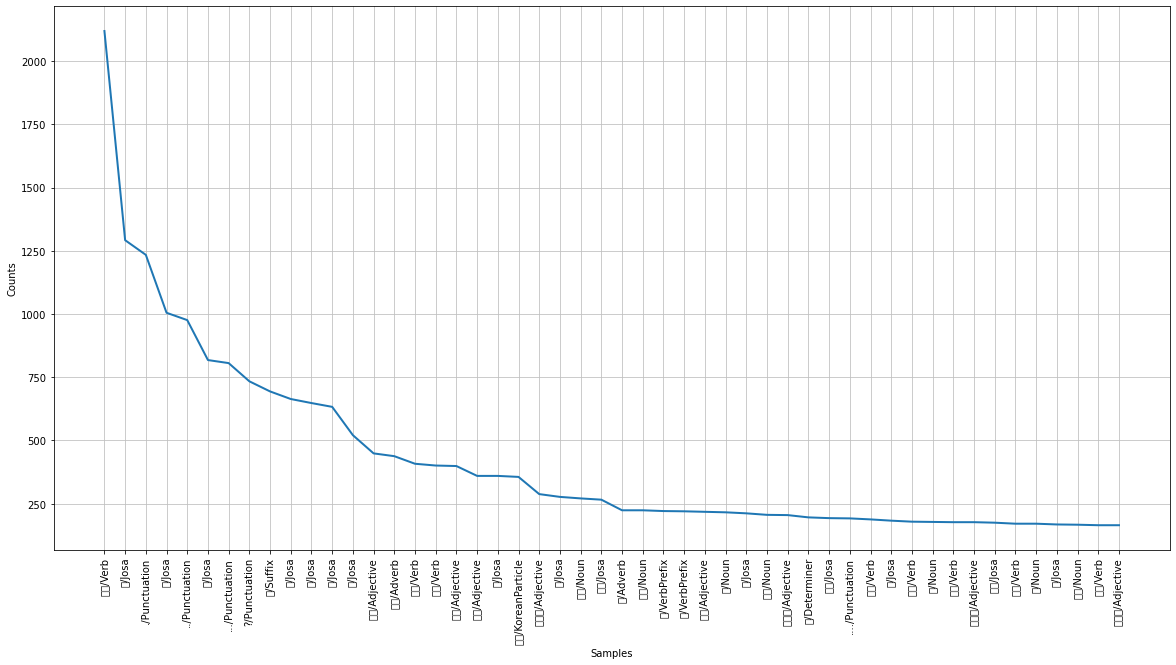

In [94]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
sadness_text.plot(50)

In [95]:
SADNESS_FREQUENCY_COUNT = 10000;
sadness_selected_words = [f[0] for f in fear_text.vocab().most_common(SADNESS_FREQUENCY_COUNT)]

In [96]:
def sadness_term_frequency(doc):
    return [doc.count(word) for word in sadness_selected_words]

In [97]:
x_sadness_train = [sadness_term_frequency(d) for d,_ in train_sadness_docs]
x_sadness_test = [sadness_term_frequency(d) for d,_ in test_sadness_docs]
y_sadness_train = [c for _,c in train_sadness_docs]
y_sadness_test = [c for _,c in test_sadness_docs]

In [98]:
import numpy as np
x_sadness_train = np.asarray(x_sadness_train).astype('float32')
x_sadness_test = np.asarray(x_sadness_test). astype('float32')

y_sadness_train = np.asarray(y_sadness_train).astype('float32')
y_sadness_test = np.asarray(y_sadness_test).astype('float32')

In [99]:
import tensorflow as tf
sadness_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(SADNESS_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [100]:
sadness_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [110]:
sadness_model.fit(x_sadness_train, y_sadness_train, epochs=5000, batch_size=512)

Epoch 1/5000
15/15 [==============================] - 0s 20ms/step - loss: 3.4649e-04 - binary_accuracy: 0.9999
Epoch 2/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.9429e-04 - binary_accuracy: 0.9997
Epoch 3/5000
15/15 [==============================] - 0s 22ms/step - loss: 3.0121e-04 - binary_accuracy: 0.9997
Epoch 4/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.8195e-04 - binary_accuracy: 0.9999
Epoch 5/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.9989e-04 - binary_accuracy: 0.9999
Epoch 6/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.9004e-04 - binary_accuracy: 0.9999
Epoch 7/5000
15/15 [==============================] - 0s 20ms/step - loss: 3.5516e-04 - binary_accuracy: 0.9999
Epoch 8/5000
15/15 [==============================] - 0s 20ms/step - loss: 3.0960e-04 - binary_accuracy: 0.9999
Epoch 9/5000
15/15 [==============================] - 0s 20ms/step - loss: 3.0130e-04 - binary_accuracy:

15/15 [==============================] - 0s 20ms/step - loss: 2.8138e-04 - binary_accuracy: 0.9997
Epoch 146/5000
15/15 [==============================] - 0s 20ms/step - loss: 3.0029e-04 - binary_accuracy: 0.9997
Epoch 147/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.8864e-04 - binary_accuracy: 0.9999
Epoch 148/5000
15/15 [==============================] - 0s 20ms/step - loss: 3.1028e-04 - binary_accuracy: 0.9997
Epoch 149/5000
15/15 [==============================] - 0s 20ms/step - loss: 3.1677e-04 - binary_accuracy: 0.9997
Epoch 150/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.7103e-04 - binary_accuracy: 0.9999
Epoch 151/5000
15/15 [==============================] - 0s 23ms/step - loss: 2.8893e-04 - binary_accuracy: 0.9997
Epoch 152/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.9050e-04 - binary_accuracy: 0.9997
Epoch 153/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.8923e-04 - binary_accura

Epoch 217/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.5715e-04 - binary_accuracy: 0.9997
Epoch 218/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.8491e-04 - binary_accuracy: 0.9999
Epoch 219/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.6403e-04 - binary_accuracy: 0.9999
Epoch 220/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.6801e-04 - binary_accuracy: 0.9997
Epoch 221/5000
15/15 [==============================] - 0s 23ms/step - loss: 2.4407e-04 - binary_accuracy: 0.9999
Epoch 222/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.2271e-04 - binary_accuracy: 0.9999
Epoch 223/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.1577e-04 - binary_accuracy: 0.9997
Epoch 224/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9357e-04 - binary_accuracy: 0.9999
Epoch 225/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.6258e-04 

Epoch 360/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.2002e-04 - binary_accuracy: 0.9999
Epoch 361/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.2508e-04 - binary_accuracy: 0.9997
Epoch 362/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.2648e-04 - binary_accuracy: 0.9997
Epoch 363/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.2018e-04 - binary_accuracy: 0.9999
Epoch 364/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.1607e-04 - binary_accuracy: 0.9997
Epoch 365/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.1627e-04 - binary_accuracy: 0.9997
Epoch 366/5000
15/15 [==============================] - 0s 22ms/step - loss: 1.8853e-04 - binary_accuracy: 0.9999
Epoch 367/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.2297e-04 - binary_accuracy: 0.9999
Epoch 368/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.1199e-04 

Epoch 503/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.0798e-04 - binary_accuracy: 0.9997
Epoch 504/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.1570e-04 - binary_accuracy: 0.9997
Epoch 505/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.2150e-04 - binary_accuracy: 0.9997
Epoch 506/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.1107e-04 - binary_accuracy: 0.9997
Epoch 507/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.1243e-04 - binary_accuracy: 0.9999
Epoch 508/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.1649e-04 - binary_accuracy: 0.9997
Epoch 509/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.1461e-04 - binary_accuracy: 0.9999
Epoch 510/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.1161e-04 - binary_accuracy: 0.9999
Epoch 511/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.1487e-04 

Epoch 646/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.0052e-04 - binary_accuracy: 0.9997
Epoch 647/5000
15/15 [==============================] - 0s 22ms/step - loss: 1.9849e-04 - binary_accuracy: 0.9997
Epoch 648/5000
15/15 [==============================] - 0s 22ms/step - loss: 1.9869e-04 - binary_accuracy: 0.9997
Epoch 649/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9837e-04 - binary_accuracy: 0.9997
Epoch 650/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.0666e-04 - binary_accuracy: 0.9997
Epoch 651/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.0402e-04 - binary_accuracy: 0.9997
Epoch 652/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.0227e-04 - binary_accuracy: 0.9999
Epoch 653/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9758e-04 - binary_accuracy: 0.9997
Epoch 654/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9803e-04 

Epoch 789/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.9428e-04 - binary_accuracy: 0.9999
Epoch 790/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9408e-04 - binary_accuracy: 0.9999
Epoch 791/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9440e-04 - binary_accuracy: 0.9997
Epoch 792/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9457e-04 - binary_accuracy: 0.9997
Epoch 793/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9352e-04 - binary_accuracy: 0.9997
Epoch 794/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.0154e-04 - binary_accuracy: 0.9999
Epoch 795/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9662e-04 - binary_accuracy: 0.9999
Epoch 796/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9813e-04 - binary_accuracy: 0.9999
Epoch 797/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9696e-04 

Epoch 932/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9208e-04 - binary_accuracy: 0.9997
Epoch 933/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8812e-04 - binary_accuracy: 0.9999
Epoch 934/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.9750e-04 - binary_accuracy: 0.9999
Epoch 935/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9639e-04 - binary_accuracy: 0.9999
Epoch 936/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9454e-04 - binary_accuracy: 0.9997
Epoch 937/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9558e-04 - binary_accuracy: 0.9999
Epoch 938/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9481e-04 - binary_accuracy: 0.9999
Epoch 939/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.9405e-04 - binary_accuracy: 0.9997
Epoch 940/5000
15/15 [==============================] - 0s 22ms/step - loss: 1.9510e-04 

Epoch 1074/5000
15/15 [==============================] - 0s 19ms/step - loss: 1.9177e-04 - binary_accuracy: 0.9997
Epoch 1075/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9148e-04 - binary_accuracy: 0.9997
Epoch 1076/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9190e-04 - binary_accuracy: 0.9997
Epoch 1077/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9141e-04 - binary_accuracy: 0.9999
Epoch 1078/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.9146e-04 - binary_accuracy: 0.9999
Epoch 1079/5000
15/15 [==============================] - 0s 23ms/step - loss: 1.9130e-04 - binary_accuracy: 0.9999
Epoch 1080/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.9128e-04 - binary_accuracy: 0.9999
Epoch 1081/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9200e-04 - binary_accuracy: 0.9997
Epoch 1082/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.

15/15 [==============================] - 0s 20ms/step - loss: 1.9136e-04 - binary_accuracy: 0.9999
Epoch 1217/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8814e-04 - binary_accuracy: 0.9999
Epoch 1218/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9124e-04 - binary_accuracy: 0.9999
Epoch 1219/5000
15/15 [==============================] - 0s 22ms/step - loss: 1.9092e-04 - binary_accuracy: 0.9999
Epoch 1220/5000
15/15 [==============================] - 0s 22ms/step - loss: 1.8977e-04 - binary_accuracy: 0.9999
Epoch 1221/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9072e-04 - binary_accuracy: 0.9999
Epoch 1222/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9022e-04 - binary_accuracy: 0.9999
Epoch 1223/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9068e-04 - binary_accuracy: 0.9997
Epoch 1224/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8815e-04 - binar

15/15 [==============================] - 0s 20ms/step - loss: 1.8995e-04 - binary_accuracy: 0.9999
Epoch 1359/5000
15/15 [==============================] - 0s 22ms/step - loss: 1.9034e-04 - binary_accuracy: 0.9997
Epoch 1360/5000
15/15 [==============================] - 0s 22ms/step - loss: 1.9061e-04 - binary_accuracy: 0.9999
Epoch 1361/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9032e-04 - binary_accuracy: 0.9999
Epoch 1362/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9041e-04 - binary_accuracy: 0.9999
Epoch 1363/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9029e-04 - binary_accuracy: 0.9997
Epoch 1364/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8811e-04 - binary_accuracy: 0.9999
Epoch 1365/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9079e-04 - binary_accuracy: 0.9997
Epoch 1366/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9017e-04 - binar

15/15 [==============================] - 0s 21ms/step - loss: 1.8950e-04 - binary_accuracy: 0.9997
Epoch 1501/5000
15/15 [==============================] - 0s 23ms/step - loss: 1.8983e-04 - binary_accuracy: 0.9997
Epoch 1502/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8925e-04 - binary_accuracy: 0.9999
Epoch 1503/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9179e-04 - binary_accuracy: 0.9997
Epoch 1504/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.8954e-04 - binary_accuracy: 0.9999
Epoch 1505/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8994e-04 - binary_accuracy: 0.9999
Epoch 1506/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8988e-04 - binary_accuracy: 0.9999
Epoch 1507/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9012e-04 - binary_accuracy: 0.9999
Epoch 1508/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8922e-04 - binar

15/15 [==============================] - 0s 22ms/step - loss: 1.8911e-04 - binary_accuracy: 0.9999
Epoch 1643/5000
15/15 [==============================] - 0s 22ms/step - loss: 1.8976e-04 - binary_accuracy: 0.9999
Epoch 1644/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8969e-04 - binary_accuracy: 0.9997
Epoch 1645/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9013e-04 - binary_accuracy: 0.9997
Epoch 1646/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8916e-04 - binary_accuracy: 0.9999
Epoch 1647/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9001e-04 - binary_accuracy: 0.9997
Epoch 1648/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8812e-04 - binary_accuracy: 0.9999
Epoch 1649/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8986e-04 - binary_accuracy: 0.9999
Epoch 1650/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9064e-04 - binar

15/15 [==============================] - 0s 20ms/step - loss: 1.9130e-04 - binary_accuracy: 0.9999
Epoch 1785/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9147e-04 - binary_accuracy: 0.9997
Epoch 1786/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9124e-04 - binary_accuracy: 0.9999
Epoch 1787/5000
15/15 [==============================] - 0s 19ms/step - loss: 1.9099e-04 - binary_accuracy: 0.9997
Epoch 1788/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9175e-04 - binary_accuracy: 0.9999
Epoch 1789/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9085e-04 - binary_accuracy: 0.9997
Epoch 1790/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9114e-04 - binary_accuracy: 0.9999
Epoch 1791/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9136e-04 - binary_accuracy: 0.9997
Epoch 1792/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9170e-04 - binar

15/15 [==============================] - 0s 20ms/step - loss: 1.9111e-04 - binary_accuracy: 0.9997
Epoch 1927/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9089e-04 - binary_accuracy: 0.9999
Epoch 1928/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9083e-04 - binary_accuracy: 0.9997
Epoch 1929/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9107e-04 - binary_accuracy: 0.9999
Epoch 1930/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9105e-04 - binary_accuracy: 0.9999
Epoch 1931/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9122e-04 - binary_accuracy: 0.9999
Epoch 1932/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.9151e-04 - binary_accuracy: 0.9999
Epoch 1933/5000
15/15 [==============================] - 0s 22ms/step - loss: 1.9123e-04 - binary_accuracy: 0.9999
Epoch 1934/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.9100e-04 - binar

15/15 [==============================] - 0s 19ms/step - loss: 1.9080e-04 - binary_accuracy: 0.9999
Epoch 2069/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9181e-04 - binary_accuracy: 0.9999
Epoch 2070/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9164e-04 - binary_accuracy: 0.9997
Epoch 2071/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9160e-04 - binary_accuracy: 0.9997
Epoch 2072/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9100e-04 - binary_accuracy: 0.9999
Epoch 2073/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.8988e-04 - binary_accuracy: 0.9999
Epoch 2074/5000
15/15 [==============================] - 0s 22ms/step - loss: 1.8984e-04 - binary_accuracy: 0.9999
Epoch 2075/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8994e-04 - binary_accuracy: 0.9999
Epoch 2076/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8985e-04 - binar

15/15 [==============================] - 0s 20ms/step - loss: 1.9040e-04 - binary_accuracy: 0.9999
Epoch 2211/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9011e-04 - binary_accuracy: 0.9999
Epoch 2212/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9039e-04 - binary_accuracy: 0.9999
Epoch 2213/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9054e-04 - binary_accuracy: 0.9997
Epoch 2214/5000
15/15 [==============================] - 0s 22ms/step - loss: 1.8999e-04 - binary_accuracy: 0.9999
Epoch 2215/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.9024e-04 - binary_accuracy: 0.9999
Epoch 2216/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8997e-04 - binary_accuracy: 0.9997
Epoch 2217/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9029e-04 - binary_accuracy: 0.9997
Epoch 2218/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9005e-04 - binar

15/15 [==============================] - 0s 21ms/step - loss: 1.8811e-04 - binary_accuracy: 0.9999
Epoch 2353/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8811e-04 - binary_accuracy: 0.9999
Epoch 2354/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.9010e-04 - binary_accuracy: 0.9999
Epoch 2355/5000
15/15 [==============================] - 0s 22ms/step - loss: 1.8949e-04 - binary_accuracy: 0.9999
Epoch 2356/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.8943e-04 - binary_accuracy: 0.9999
Epoch 2357/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8811e-04 - binary_accuracy: 0.9999
Epoch 2358/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8975e-04 - binary_accuracy: 0.9997
Epoch 2359/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8932e-04 - binary_accuracy: 0.9999
Epoch 2360/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8950e-04 - binar

15/15 [==============================] - 0s 20ms/step - loss: 1.8993e-04 - binary_accuracy: 0.9997
Epoch 2495/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.8992e-04 - binary_accuracy: 0.9997
Epoch 2496/5000
15/15 [==============================] - 0s 22ms/step - loss: 1.9012e-04 - binary_accuracy: 0.9997
Epoch 2497/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8979e-04 - binary_accuracy: 0.9999
Epoch 2498/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8969e-04 - binary_accuracy: 0.9999
Epoch 2499/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8990e-04 - binary_accuracy: 0.9997
Epoch 2500/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8990e-04 - binary_accuracy: 0.9999
Epoch 2501/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9017e-04 - binary_accuracy: 0.9997
Epoch 2502/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8964e-04 - binar

15/15 [==============================] - 0s 22ms/step - loss: 1.8968e-04 - binary_accuracy: 0.9999
Epoch 2637/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.8939e-04 - binary_accuracy: 0.9999
Epoch 2638/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8964e-04 - binary_accuracy: 0.9997
Epoch 2639/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8811e-04 - binary_accuracy: 0.9999
Epoch 2640/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8999e-04 - binary_accuracy: 0.9999
Epoch 2641/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8977e-04 - binary_accuracy: 0.9999
Epoch 2642/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8902e-04 - binary_accuracy: 0.9997
Epoch 2643/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8922e-04 - binary_accuracy: 0.9999
Epoch 2644/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8961e-04 - binar

15/15 [==============================] - 0s 21ms/step - loss: 1.8811e-04 - binary_accuracy: 0.9999
Epoch 2779/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8978e-04 - binary_accuracy: 0.9997
Epoch 2780/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8958e-04 - binary_accuracy: 0.9997
Epoch 2781/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8959e-04 - binary_accuracy: 0.9999
Epoch 2782/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8953e-04 - binary_accuracy: 0.9999
Epoch 2783/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8946e-04 - binary_accuracy: 0.9999
Epoch 2784/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8940e-04 - binary_accuracy: 0.9997
Epoch 2785/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8939e-04 - binary_accuracy: 0.9997
Epoch 2786/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8941e-04 - binar

15/15 [==============================] - 0s 20ms/step - loss: 1.9256e-04 - binary_accuracy: 0.9997
Epoch 2921/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9571e-04 - binary_accuracy: 0.9999
Epoch 2922/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9540e-04 - binary_accuracy: 0.9997
Epoch 2923/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9412e-04 - binary_accuracy: 0.9997
Epoch 2924/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9399e-04 - binary_accuracy: 0.9999
Epoch 2925/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9372e-04 - binary_accuracy: 0.9997
Epoch 2926/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.9458e-04 - binary_accuracy: 0.9997
Epoch 2927/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9656e-04 - binary_accuracy: 0.9997
Epoch 2928/5000
15/15 [==============================] - 0s 22ms/step - loss: 2.0169e-04 - binar

15/15 [==============================] - 0s 20ms/step - loss: 1.9007e-04 - binary_accuracy: 0.9999
Epoch 3063/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9214e-04 - binary_accuracy: 0.9999
Epoch 3064/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9153e-04 - binary_accuracy: 0.9997
Epoch 3065/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9183e-04 - binary_accuracy: 0.9999
Epoch 3066/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9282e-04 - binary_accuracy: 0.9997
Epoch 3067/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9048e-04 - binary_accuracy: 0.9997
Epoch 3068/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9176e-04 - binary_accuracy: 0.9999
Epoch 3069/5000
15/15 [==============================] - 0s 22ms/step - loss: 1.9122e-04 - binary_accuracy: 0.9999
Epoch 3070/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.9276e-04 - binar

15/15 [==============================] - 0s 20ms/step - loss: 1.9841e-04 - binary_accuracy: 0.9997
Epoch 3205/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8813e-04 - binary_accuracy: 0.9999
Epoch 3206/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.0305e-04 - binary_accuracy: 0.9999
Epoch 3207/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9914e-04 - binary_accuracy: 0.9997
Epoch 3208/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9910e-04 - binary_accuracy: 0.9999
Epoch 3209/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.8824e-04 - binary_accuracy: 0.9999
Epoch 3210/5000
15/15 [==============================] - 0s 22ms/step - loss: 1.9938e-04 - binary_accuracy: 0.9997
Epoch 3211/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9771e-04 - binary_accuracy: 0.9997
Epoch 3212/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9910e-04 - binar

15/15 [==============================] - 0s 20ms/step - loss: 1.9306e-04 - binary_accuracy: 0.9999
Epoch 3347/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9421e-04 - binary_accuracy: 0.9997
Epoch 3348/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9355e-04 - binary_accuracy: 0.9999
Epoch 3349/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9233e-04 - binary_accuracy: 0.9999
Epoch 3350/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9535e-04 - binary_accuracy: 0.9997
Epoch 3351/5000
15/15 [==============================] - 0s 22ms/step - loss: 1.9390e-04 - binary_accuracy: 0.9999
Epoch 3352/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.9369e-04 - binary_accuracy: 0.9999
Epoch 3353/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9287e-04 - binary_accuracy: 0.9997
Epoch 3354/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9418e-04 - binar

15/15 [==============================] - 0s 20ms/step - loss: 1.9058e-04 - binary_accuracy: 0.9999
Epoch 3489/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9028e-04 - binary_accuracy: 0.9999
Epoch 3490/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9109e-04 - binary_accuracy: 0.9999
Epoch 3491/5000
15/15 [==============================] - 0s 22ms/step - loss: 1.9119e-04 - binary_accuracy: 0.9999
Epoch 3492/5000
15/15 [==============================] - 0s 22ms/step - loss: 1.8840e-04 - binary_accuracy: 0.9999
Epoch 3493/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9230e-04 - binary_accuracy: 0.9999
Epoch 3494/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9307e-04 - binary_accuracy: 0.9997
Epoch 3495/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9438e-04 - binary_accuracy: 0.9997
Epoch 3496/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9426e-04 - binar

15/15 [==============================] - 0s 20ms/step - loss: 1.9441e-04 - binary_accuracy: 0.9997
Epoch 3631/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.9185e-04 - binary_accuracy: 0.9999
Epoch 3632/5000
15/15 [==============================] - 0s 22ms/step - loss: 1.9297e-04 - binary_accuracy: 0.9999
Epoch 3633/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.9314e-04 - binary_accuracy: 0.9997
Epoch 3634/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9482e-04 - binary_accuracy: 0.9997
Epoch 3635/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9445e-04 - binary_accuracy: 0.9997
Epoch 3636/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9382e-04 - binary_accuracy: 0.9999
Epoch 3637/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9373e-04 - binary_accuracy: 0.9999
Epoch 3638/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9391e-04 - binar

15/15 [==============================] - 0s 20ms/step - loss: 1.9283e-04 - binary_accuracy: 0.9997
Epoch 3773/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9194e-04 - binary_accuracy: 0.9997
Epoch 3774/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.9168e-04 - binary_accuracy: 0.9999
Epoch 3775/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9131e-04 - binary_accuracy: 0.9997
Epoch 3776/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9119e-04 - binary_accuracy: 0.9997
Epoch 3777/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.9163e-04 - binary_accuracy: 0.9999
Epoch 3778/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9130e-04 - binary_accuracy: 0.9999
Epoch 3779/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8812e-04 - binary_accuracy: 0.9999
Epoch 3780/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8810e-04 - binar

Epoch 3914/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8970e-04 - binary_accuracy: 0.9997
Epoch 3915/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8982e-04 - binary_accuracy: 0.9999
Epoch 3916/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9000e-04 - binary_accuracy: 0.9997
Epoch 3917/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8965e-04 - binary_accuracy: 0.9999
Epoch 3918/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8911e-04 - binary_accuracy: 0.9999
Epoch 3919/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8883e-04 - binary_accuracy: 0.9997
Epoch 3920/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8940e-04 - binary_accuracy: 0.9997
Epoch 3921/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.8973e-04 - binary_accuracy: 0.9997
Epoch 3922/5000
15/15 [==============================] - 0s 22ms/step - loss: 1.

15/15 [==============================] - 0s 20ms/step - loss: 1.9145e-04 - binary_accuracy: 0.9997
Epoch 4057/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9229e-04 - binary_accuracy: 0.9999
Epoch 4058/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9158e-04 - binary_accuracy: 0.9997
Epoch 4059/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9087e-04 - binary_accuracy: 0.9999
Epoch 4060/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9166e-04 - binary_accuracy: 0.9999
Epoch 4061/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.9074e-04 - binary_accuracy: 0.9997
Epoch 4062/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.9105e-04 - binary_accuracy: 0.9997
Epoch 4063/5000
15/15 [==============================] - 0s 22ms/step - loss: 1.9017e-04 - binary_accuracy: 0.9999
Epoch 4064/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9113e-04 - binar

15/15 [==============================] - 0s 20ms/step - loss: 1.8814e-04 - binary_accuracy: 0.9999
Epoch 4199/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9044e-04 - binary_accuracy: 0.9997
Epoch 4200/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9025e-04 - binary_accuracy: 0.9997
Epoch 4201/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9003e-04 - binary_accuracy: 0.9997
Epoch 4202/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9004e-04 - binary_accuracy: 0.9997
Epoch 4203/5000
15/15 [==============================] - 0s 22ms/step - loss: 1.8999e-04 - binary_accuracy: 0.9999
Epoch 4204/5000
15/15 [==============================] - 0s 22ms/step - loss: 1.8980e-04 - binary_accuracy: 0.9997
Epoch 4205/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.8984e-04 - binary_accuracy: 0.9997
Epoch 4206/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8984e-04 - binar

15/15 [==============================] - 0s 20ms/step - loss: 1.8810e-04 - binary_accuracy: 0.9999
Epoch 4341/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9037e-04 - binary_accuracy: 0.9997
Epoch 4342/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9025e-04 - binary_accuracy: 0.9997
Epoch 4343/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.8968e-04 - binary_accuracy: 0.9999
Epoch 4344/5000
15/15 [==============================] - 0s 22ms/step - loss: 1.8992e-04 - binary_accuracy: 0.9997
Epoch 4345/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.9006e-04 - binary_accuracy: 0.9999
Epoch 4346/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8980e-04 - binary_accuracy: 0.9999
Epoch 4347/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8983e-04 - binary_accuracy: 0.9997
Epoch 4348/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8898e-04 - binar

15/15 [==============================] - 0s 20ms/step - loss: 1.9117e-04 - binary_accuracy: 0.9997
Epoch 4483/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8995e-04 - binary_accuracy: 0.9997
Epoch 4484/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8893e-04 - binary_accuracy: 0.9999
Epoch 4485/5000
15/15 [==============================] - 0s 23ms/step - loss: 1.8927e-04 - binary_accuracy: 0.9997
Epoch 4486/5000
15/15 [==============================] - 0s 22ms/step - loss: 1.8954e-04 - binary_accuracy: 0.9997
Epoch 4487/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8998e-04 - binary_accuracy: 0.9999
Epoch 4488/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8984e-04 - binary_accuracy: 0.9999
Epoch 4489/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8977e-04 - binary_accuracy: 0.9997
Epoch 4490/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8953e-04 - binar

Epoch 4624/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8912e-04 - binary_accuracy: 0.9999
Epoch 4625/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.8935e-04 - binary_accuracy: 0.9997
Epoch 4626/5000
15/15 [==============================] - 0s 22ms/step - loss: 1.8900e-04 - binary_accuracy: 0.9997
Epoch 4627/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.8920e-04 - binary_accuracy: 0.9997
Epoch 4628/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8917e-04 - binary_accuracy: 0.9997
Epoch 4629/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8912e-04 - binary_accuracy: 0.9999
Epoch 4630/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8914e-04 - binary_accuracy: 0.9999
Epoch 4631/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8924e-04 - binary_accuracy: 0.9997
Epoch 4632/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.

15/15 [==============================] - 0s 21ms/step - loss: 1.8905e-04 - binary_accuracy: 0.9997
Epoch 4767/5000
15/15 [==============================] - 0s 23ms/step - loss: 1.8908e-04 - binary_accuracy: 0.9997
Epoch 4768/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8928e-04 - binary_accuracy: 0.9997
Epoch 4769/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8902e-04 - binary_accuracy: 0.9999
Epoch 4770/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8909e-04 - binary_accuracy: 0.9997
Epoch 4771/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8911e-04 - binary_accuracy: 0.9999
Epoch 4772/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8923e-04 - binary_accuracy: 0.9999
Epoch 4773/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8810e-04 - binary_accuracy: 0.9999
Epoch 4774/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8932e-04 - binar

Epoch 4908/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.8897e-04 - binary_accuracy: 0.9999
Epoch 4909/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.8909e-04 - binary_accuracy: 0.9999
Epoch 4910/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8912e-04 - binary_accuracy: 0.9999
Epoch 4911/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8916e-04 - binary_accuracy: 0.9999
Epoch 4912/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8909e-04 - binary_accuracy: 0.9999
Epoch 4913/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8904e-04 - binary_accuracy: 0.9999
Epoch 4914/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8910e-04 - binary_accuracy: 0.9999
Epoch 4915/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.8919e-04 - binary_accuracy: 0.9999
Epoch 4916/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.

In [111]:
sadness_results = sadness_model.evaluate(x_sadness_test, y_sadness_test)

99/99 [==============================] - 0s 2ms/step - loss: 3.9285 - binary_accuracy: 0.7381


In [112]:
sadness_results

[3.928497314453125, 0.7381253838539124]

In [113]:
sadness_model.save('sadness_model.h5')

In [114]:
sadness_review = "너무 화난다"
sadness_token = tokenize(sadness_review)
sadness_token

['너무/Adverb', '화나다/Verb']

In [115]:
tf = sadness_term_frequency(sadness_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(sadness_model.predict(data))

0.0847543478012085

In [116]:
def sadness_predict(predict):
    sadness_token = tokenize(predict)
    sadness_tfq = sadness_term_frequency(sadness_token)
    sadness_data = np.expand_dims(np.asarray(sadness_tfq).astype('float32'), axis=0)
    sadness_score = float(sadness_model.predict(sadness_data))
    if(sadness_score > 0.5):
        print(f"{predict} ==> 슬픔 ({round(sadness_score*100)}%)")
    else:
        print(f"{predict} ==> 슬픔X ({round((1-sadness_score)*100)}%)")

In [197]:
sadness_predict(".")

. ==> 슬픔 (100%)


In [118]:
#중립 감정 분석

In [119]:
import pandas as pd
train_neutral_df = pd.read_csv("neutraltraindata.txt","\t")
test_neutral_df = pd.read_csv("neutraltestdata.txt","\t")

In [120]:
from konlpy.tag import Okt
okt_neutral = Okt()

In [121]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_neutral.pos(doc, norm=True, stem=True)]

In [122]:
train_neutral_docs = [(tokenize(row[1]), row[2]) for row in train_neutral_df.values]
test_neutral_docs = [(tokenize(row[1]),row[2]) for row in test_neutral_df.values]

In [123]:
print(train_neutral_docs[0])
print(test_neutral_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [124]:
tokens = [t for d in train_neutral_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 63825


In [125]:
import nltk
neutral_text = nltk.Text(tokens, name='NMSC')
print(len(neutral_text.tokens))
print(len(set(neutral_text.tokens)))
print(neutral_text.vocab().most_common(10))

63825
10457
[('하다/Verb', 2005), ('이/Josa', 1209), ('./Punctuation', 1141), ('가/Josa', 917), ('?/Punctuation', 841), ('에/Josa', 788), ('은/Josa', 746), ('들/Suffix', 680), ('../Punctuation', 579), ('을/Josa', 578)]


C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_text(s, 0, flags=flags)


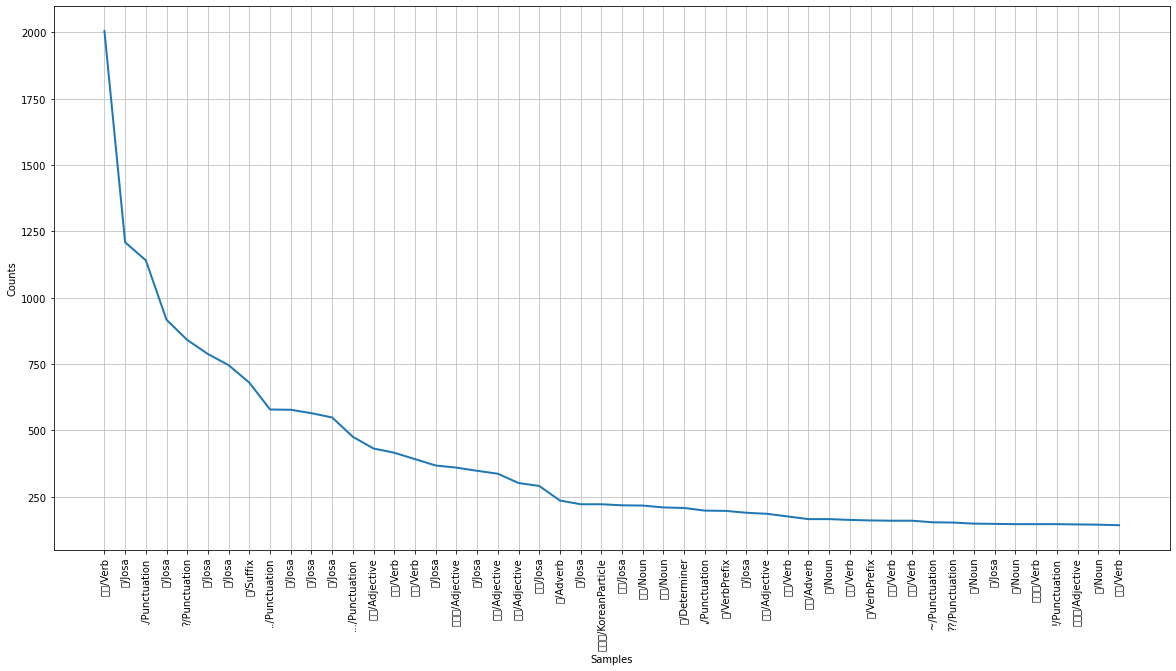

In [126]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
neutral_text.plot(50)

In [127]:
NEUTRAL_FREQUENCY_COUNT = 10000;
neutral_selected_words = [f[0] for f in neutral_text.vocab().most_common(NEUTRAL_FREQUENCY_COUNT)]

In [128]:
def neutral_term_frequency(doc):
    return [doc.count(word) for word in neutral_selected_words]

In [129]:
x_neutral_train = [neutral_term_frequency(d) for d,_ in train_neutral_docs]
x_neutral_test = [neutral_term_frequency(d) for d,_ in test_neutral_docs]
y_neutral_train = [c for _,c in train_neutral_docs]
y_neutral_test = [c for _,c in test_neutral_docs]

In [130]:
import numpy as np
x_neutral_train = np.asarray(x_neutral_train).astype('float32')
x_neutral_test = np.asarray(x_neutral_test). astype('float32')

y_neutral_train = np.asarray(y_neutral_train).astype('float32')
y_neutral_test = np.asarray(y_neutral_test).astype('float32')

In [131]:
import tensorflow as tf
neutral_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(NEUTRAL_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [132]:
neutral_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [133]:
neutral_model.fit(x_neutral_train, y_neutral_train, epochs=5000, batch_size=512)

Epoch 1/5000
14/14 [==============================] - 0s 23ms/step - loss: 0.6825 - binary_accuracy: 0.5942
Epoch 2/5000
14/14 [==============================] - 0s 20ms/step - loss: 0.5940 - binary_accuracy: 0.7710
Epoch 3/5000
14/14 [==============================] - 0s 19ms/step - loss: 0.4758 - binary_accuracy: 0.8229
Epoch 4/5000
14/14 [==============================] - 0s 19ms/step - loss: 0.3726 - binary_accuracy: 0.8689
Epoch 5/5000
14/14 [==============================] - 0s 19ms/step - loss: 0.2884 - binary_accuracy: 0.9024
Epoch 6/5000
14/14 [==============================] - 0s 19ms/step - loss: 0.2215 - binary_accuracy: 0.9309
Epoch 7/5000
14/14 [==============================] - 0s 19ms/step - loss: 0.1698 - binary_accuracy: 0.9507
Epoch 8/5000
14/14 [==============================] - 0s 32ms/step - loss: 0.1286 - binary_accuracy: 0.9623
Epoch 9/5000
14/14 [==============================] - 0s 19ms/step - loss: 0.0976 - binary_accuracy: 0.9728
Epoch 10/5000
14/14 [=======

14/14 [==============================] - 0s 20ms/step - loss: 4.5328e-04 - binary_accuracy: 0.9999
Epoch 147/5000
14/14 [==============================] - 0s 19ms/step - loss: 3.7973e-04 - binary_accuracy: 0.9997
Epoch 148/5000
14/14 [==============================] - 0s 19ms/step - loss: 3.6562e-04 - binary_accuracy: 0.9997
Epoch 149/5000
14/14 [==============================] - 0s 19ms/step - loss: 4.0446e-04 - binary_accuracy: 0.9997
Epoch 150/5000
14/14 [==============================] - 0s 19ms/step - loss: 3.7512e-04 - binary_accuracy: 0.9999
Epoch 151/5000
14/14 [==============================] - 0s 20ms/step - loss: 3.5487e-04 - binary_accuracy: 0.9999
Epoch 152/5000
14/14 [==============================] - 0s 20ms/step - loss: 4.2537e-04 - binary_accuracy: 0.9999
Epoch 153/5000
14/14 [==============================] - 0s 23ms/step - loss: 2.0546e-04 - binary_accuracy: 0.9999
Epoch 154/5000
14/14 [==============================] - 0s 21ms/step - loss: 4.3967e-04 - binary_accura

Epoch 218/5000
14/14 [==============================] - 0s 20ms/step - loss: 3.7629e-04 - binary_accuracy: 0.9997
Epoch 219/5000
14/14 [==============================] - 0s 19ms/step - loss: 3.8814e-04 - binary_accuracy: 0.9997
Epoch 220/5000
14/14 [==============================] - 0s 20ms/step - loss: 3.4762e-04 - binary_accuracy: 0.9999
Epoch 221/5000
14/14 [==============================] - 0s 20ms/step - loss: 3.6579e-04 - binary_accuracy: 0.9999
Epoch 222/5000
14/14 [==============================] - 0s 19ms/step - loss: 3.2782e-04 - binary_accuracy: 0.9999
Epoch 223/5000
14/14 [==============================] - 0s 20ms/step - loss: 3.4700e-04 - binary_accuracy: 0.9999
Epoch 224/5000
14/14 [==============================] - 0s 21ms/step - loss: 4.0905e-04 - binary_accuracy: 0.9999
Epoch 225/5000
14/14 [==============================] - 0s 21ms/step - loss: 4.0207e-04 - binary_accuracy: 0.9997
Epoch 226/5000
14/14 [==============================] - 0s 20ms/step - loss: 3.9069e-04 

Epoch 361/5000
14/14 [==============================] - 0s 20ms/step - loss: 3.2709e-04 - binary_accuracy: 0.9997
Epoch 362/5000
14/14 [==============================] - 0s 20ms/step - loss: 3.1104e-04 - binary_accuracy: 0.9999
Epoch 363/5000
14/14 [==============================] - 0s 20ms/step - loss: 3.0898e-04 - binary_accuracy: 0.9997
Epoch 364/5000
14/14 [==============================] - 0s 20ms/step - loss: 3.2184e-04 - binary_accuracy: 0.9999
Epoch 365/5000
14/14 [==============================] - 0s 22ms/step - loss: 3.4423e-04 - binary_accuracy: 0.9999
Epoch 366/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.8924e-04 - binary_accuracy: 0.9999
Epoch 367/5000
14/14 [==============================] - 0s 19ms/step - loss: 3.2597e-04 - binary_accuracy: 0.9999
Epoch 368/5000
14/14 [==============================] - 0s 19ms/step - loss: 3.1383e-04 - binary_accuracy: 0.9999
Epoch 369/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.9415e-04 

Epoch 504/5000
14/14 [==============================] - 0s 22ms/step - loss: 2.9734e-04 - binary_accuracy: 0.9997
Epoch 505/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.8685e-04 - binary_accuracy: 0.9997
Epoch 506/5000
14/14 [==============================] - 0s 20ms/step - loss: 3.0671e-04 - binary_accuracy: 0.9999
Epoch 507/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0554e-04 - binary_accuracy: 0.9999
Epoch 508/5000
14/14 [==============================] - 0s 20ms/step - loss: 3.1811e-04 - binary_accuracy: 0.9997
Epoch 509/5000
14/14 [==============================] - 0s 20ms/step - loss: 3.0841e-04 - binary_accuracy: 0.9999
Epoch 510/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.5608e-04 - binary_accuracy: 0.9999
Epoch 511/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.6304e-04 - binary_accuracy: 0.9999
Epoch 512/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.6036e-04 

Epoch 647/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.6086e-04 - binary_accuracy: 0.9999
Epoch 648/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.6240e-04 - binary_accuracy: 0.9999
Epoch 649/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.6681e-04 - binary_accuracy: 0.9999
Epoch 650/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0535e-04 - binary_accuracy: 0.9999
Epoch 651/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.8241e-04 - binary_accuracy: 0.9999
Epoch 652/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.5216e-04 - binary_accuracy: 0.9999
Epoch 653/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.4912e-04 - binary_accuracy: 0.9997
Epoch 654/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.5944e-04 - binary_accuracy: 0.9999
Epoch 655/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.4371e-04 

Epoch 790/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.5317e-04 - binary_accuracy: 0.9999
Epoch 791/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.4235e-04 - binary_accuracy: 0.9997
Epoch 792/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.3719e-04 - binary_accuracy: 0.9997
Epoch 793/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.4882e-04 - binary_accuracy: 0.9997
Epoch 794/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.4505e-04 - binary_accuracy: 0.9997
Epoch 795/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.4488e-04 - binary_accuracy: 0.9999
Epoch 796/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.0532e-04 - binary_accuracy: 0.9999
Epoch 797/5000
14/14 [==============================] - 0s 24ms/step - loss: 2.5067e-04 - binary_accuracy: 0.9999
Epoch 798/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.2991e-04 

Epoch 933/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.4691e-04 - binary_accuracy: 0.9997
Epoch 934/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.4015e-04 - binary_accuracy: 0.9999
Epoch 935/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.4666e-04 - binary_accuracy: 0.9997
Epoch 936/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.4158e-04 - binary_accuracy: 0.9997
Epoch 937/5000
14/14 [==============================] - 0s 23ms/step - loss: 2.4072e-04 - binary_accuracy: 0.9997
Epoch 938/5000
14/14 [==============================] - 0s 23ms/step - loss: 2.4785e-04 - binary_accuracy: 0.9997
Epoch 939/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.5136e-04 - binary_accuracy: 0.9999
Epoch 940/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.1515e-04 - binary_accuracy: 0.9997
Epoch 941/5000
14/14 [==============================] - 0s 23ms/step - loss: 2.2183e-04 

14/14 [==============================] - 0s 20ms/step - loss: 2.0720e-04 - binary_accuracy: 0.9999
Epoch 1076/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.1969e-04 - binary_accuracy: 0.9999
Epoch 1077/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.2813e-04 - binary_accuracy: 0.9997
Epoch 1078/5000
14/14 [==============================] - 0s 22ms/step - loss: 2.2886e-04 - binary_accuracy: 0.9997
Epoch 1079/5000
14/14 [==============================] - 0s 22ms/step - loss: 2.2356e-04 - binary_accuracy: 0.9997
Epoch 1080/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.2887e-04 - binary_accuracy: 0.9997
Epoch 1081/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.2228e-04 - binary_accuracy: 0.9999
Epoch 1082/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.2528e-04 - binary_accuracy: 0.9999
Epoch 1083/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.2652e-04 - binar

14/14 [==============================] - 0s 22ms/step - loss: 2.1864e-04 - binary_accuracy: 0.9997
Epoch 1218/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.1933e-04 - binary_accuracy: 0.9997
Epoch 1219/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.1685e-04 - binary_accuracy: 0.9999
Epoch 1220/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.1845e-04 - binary_accuracy: 0.9997
Epoch 1221/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.1612e-04 - binary_accuracy: 0.9999
Epoch 1222/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.1952e-04 - binary_accuracy: 0.9999
Epoch 1223/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.2044e-04 - binary_accuracy: 0.9999
Epoch 1224/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.1771e-04 - binary_accuracy: 0.9997
Epoch 1225/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.1820e-04 - binar

14/14 [==============================] - 0s 20ms/step - loss: 2.1423e-04 - binary_accuracy: 0.9999
Epoch 1360/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.1532e-04 - binary_accuracy: 0.9999
Epoch 1361/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.1529e-04 - binary_accuracy: 0.9999
Epoch 1362/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.1544e-04 - binary_accuracy: 0.9999
Epoch 1363/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.0600e-04 - binary_accuracy: 0.9999
Epoch 1364/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.1704e-04 - binary_accuracy: 0.9999
Epoch 1365/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.1503e-04 - binary_accuracy: 0.9997
Epoch 1366/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.1204e-04 - binary_accuracy: 0.9999
Epoch 1367/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.1697e-04 - binar

Epoch 1501/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0891e-04 - binary_accuracy: 0.9997
Epoch 1502/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0919e-04 - binary_accuracy: 0.9999
Epoch 1503/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0883e-04 - binary_accuracy: 0.9999
Epoch 1504/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.0919e-04 - binary_accuracy: 0.9997
Epoch 1505/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0513e-04 - binary_accuracy: 0.9999
Epoch 1506/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.1208e-04 - binary_accuracy: 0.9999
Epoch 1507/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.0999e-04 - binary_accuracy: 0.9997
Epoch 1508/5000
14/14 [==============================] - 0s 22ms/step - loss: 2.1706e-04 - binary_accuracy: 0.9997
Epoch 1509/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.

14/14 [==============================] - 0s 20ms/step - loss: 2.0516e-04 - binary_accuracy: 0.9999
Epoch 1644/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0781e-04 - binary_accuracy: 0.9999
Epoch 1645/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0818e-04 - binary_accuracy: 0.9997
Epoch 1646/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0516e-04 - binary_accuracy: 0.9999
Epoch 1647/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.1017e-04 - binary_accuracy: 0.9997
Epoch 1648/5000
14/14 [==============================] - 0s 22ms/step - loss: 2.0916e-04 - binary_accuracy: 0.9997
Epoch 1649/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0621e-04 - binary_accuracy: 0.9999
Epoch 1650/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0854e-04 - binary_accuracy: 0.9999
Epoch 1651/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0655e-04 - binar

14/14 [==============================] - 0s 20ms/step - loss: 2.1527e-04 - binary_accuracy: 0.9997
Epoch 1786/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.1669e-04 - binary_accuracy: 0.9999
Epoch 1787/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.1601e-04 - binary_accuracy: 0.9997
Epoch 1788/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.1549e-04 - binary_accuracy: 0.9997
Epoch 1789/5000
14/14 [==============================] - 0s 22ms/step - loss: 2.1795e-04 - binary_accuracy: 0.9999
Epoch 1790/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.1743e-04 - binary_accuracy: 0.9999
Epoch 1791/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.1464e-04 - binary_accuracy: 0.9999
Epoch 1792/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.0778e-04 - binary_accuracy: 0.9999
Epoch 1793/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.1174e-04 - binar

14/14 [==============================] - 0s 19ms/step - loss: 2.1072e-04 - binary_accuracy: 0.9999
Epoch 1928/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0982e-04 - binary_accuracy: 0.9999
Epoch 1929/5000
14/14 [==============================] - 0s 22ms/step - loss: 2.0996e-04 - binary_accuracy: 0.9999
Epoch 1930/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.0517e-04 - binary_accuracy: 0.9999
Epoch 1931/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.1120e-04 - binary_accuracy: 0.9999
Epoch 1932/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.1026e-04 - binary_accuracy: 0.9999
Epoch 1933/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.0988e-04 - binary_accuracy: 0.9997
Epoch 1934/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.1047e-04 - binary_accuracy: 0.9997
Epoch 1935/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0990e-04 - binar

14/14 [==============================] - 0s 20ms/step - loss: 2.0760e-04 - binary_accuracy: 0.9997
Epoch 2070/5000
14/14 [==============================] - 0s 22ms/step - loss: 2.0696e-04 - binary_accuracy: 0.9997
Epoch 2071/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.0739e-04 - binary_accuracy: 0.9999
Epoch 2072/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0771e-04 - binary_accuracy: 0.9999
Epoch 2073/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0742e-04 - binary_accuracy: 0.9997
Epoch 2074/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0736e-04 - binary_accuracy: 0.9997
Epoch 2075/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.1024e-04 - binary_accuracy: 0.9997
Epoch 2076/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0915e-04 - binary_accuracy: 0.9997
Epoch 2077/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.0791e-04 - binar

14/14 [==============================] - 0s 22ms/step - loss: 2.0990e-04 - binary_accuracy: 0.9999
Epoch 2212/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.1008e-04 - binary_accuracy: 0.9997
Epoch 2213/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.1060e-04 - binary_accuracy: 0.9997
Epoch 2214/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0991e-04 - binary_accuracy: 0.9997
Epoch 2215/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.1030e-04 - binary_accuracy: 0.9997
Epoch 2216/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0992e-04 - binary_accuracy: 0.9997
Epoch 2217/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0913e-04 - binary_accuracy: 0.9997
Epoch 2218/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0998e-04 - binary_accuracy: 0.9999
Epoch 2219/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0710e-04 - binar

14/14 [==============================] - 0s 20ms/step - loss: 2.0955e-04 - binary_accuracy: 0.9997
Epoch 2354/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0907e-04 - binary_accuracy: 0.9997
Epoch 2355/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.0968e-04 - binary_accuracy: 0.9999
Epoch 2356/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.1009e-04 - binary_accuracy: 0.9999
Epoch 2357/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.1105e-04 - binary_accuracy: 0.9997
Epoch 2358/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.1007e-04 - binary_accuracy: 0.9999
Epoch 2359/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0979e-04 - binary_accuracy: 0.9997
Epoch 2360/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.1019e-04 - binary_accuracy: 0.9997
Epoch 2361/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0974e-04 - binar

14/14 [==============================] - 0s 19ms/step - loss: 2.0829e-04 - binary_accuracy: 0.9997
Epoch 2496/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.0876e-04 - binary_accuracy: 0.9997
Epoch 2497/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0818e-04 - binary_accuracy: 0.9997
Epoch 2498/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.0804e-04 - binary_accuracy: 0.9997
Epoch 2499/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0826e-04 - binary_accuracy: 0.9999
Epoch 2500/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0840e-04 - binary_accuracy: 0.9997
Epoch 2501/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.0860e-04 - binary_accuracy: 0.9999
Epoch 2502/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.0831e-04 - binary_accuracy: 0.9999
Epoch 2503/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.0843e-04 - binar

14/14 [==============================] - 0s 20ms/step - loss: 2.0671e-04 - binary_accuracy: 0.9999
Epoch 2638/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0661e-04 - binary_accuracy: 0.9999
Epoch 2639/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0664e-04 - binary_accuracy: 0.9999
Epoch 2640/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0677e-04 - binary_accuracy: 0.9999
Epoch 2641/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.0513e-04 - binary_accuracy: 0.9999
Epoch 2642/5000
14/14 [==============================] - 0s 22ms/step - loss: 2.0513e-04 - binary_accuracy: 0.9999
Epoch 2643/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.0710e-04 - binary_accuracy: 0.9999
Epoch 2644/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0658e-04 - binary_accuracy: 0.9999
Epoch 2645/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0646e-04 - binar

14/14 [==============================] - 0s 20ms/step - loss: 2.0644e-04 - binary_accuracy: 0.9999
Epoch 2780/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0650e-04 - binary_accuracy: 0.9997
Epoch 2781/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.0669e-04 - binary_accuracy: 0.9999
Epoch 2782/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0651e-04 - binary_accuracy: 0.9999
Epoch 2783/5000
14/14 [==============================] - 0s 22ms/step - loss: 2.0633e-04 - binary_accuracy: 0.9997
Epoch 2784/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.0661e-04 - binary_accuracy: 0.9999
Epoch 2785/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0651e-04 - binary_accuracy: 0.9999
Epoch 2786/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0669e-04 - binary_accuracy: 0.9999
Epoch 2787/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.0632e-04 - binar

14/14 [==============================] - 0s 19ms/step - loss: 2.0514e-04 - binary_accuracy: 0.9999
Epoch 2922/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.0513e-04 - binary_accuracy: 0.9999
Epoch 2923/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.0934e-04 - binary_accuracy: 0.9999
Epoch 2924/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.0515e-04 - binary_accuracy: 0.9999
Epoch 2925/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0904e-04 - binary_accuracy: 0.9999
Epoch 2926/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0518e-04 - binary_accuracy: 0.9999
Epoch 2927/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0915e-04 - binary_accuracy: 0.9997
Epoch 2928/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0513e-04 - binary_accuracy: 0.9999
Epoch 2929/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.0905e-04 - binar

14/14 [==============================] - 0s 20ms/step - loss: 2.0621e-04 - binary_accuracy: 0.9999
Epoch 3064/5000
14/14 [==============================] - 0s 22ms/step - loss: 2.0652e-04 - binary_accuracy: 0.9997
Epoch 3065/5000
14/14 [==============================] - 0s 22ms/step - loss: 2.0645e-04 - binary_accuracy: 0.9999
Epoch 3066/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0511e-04 - binary_accuracy: 0.9999
Epoch 3067/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0594e-04 - binary_accuracy: 0.9997
Epoch 3068/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0601e-04 - binary_accuracy: 0.9999
Epoch 3069/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.0637e-04 - binary_accuracy: 0.9999
Epoch 3070/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0636e-04 - binary_accuracy: 0.9999
Epoch 3071/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0622e-04 - binar

14/14 [==============================] - 0s 23ms/step - loss: 2.0621e-04 - binary_accuracy: 0.9999
Epoch 3206/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0615e-04 - binary_accuracy: 0.9997
Epoch 3207/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0629e-04 - binary_accuracy: 0.9999
Epoch 3208/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0610e-04 - binary_accuracy: 0.9999
Epoch 3209/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0619e-04 - binary_accuracy: 0.9997
Epoch 3210/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0612e-04 - binary_accuracy: 0.9997
Epoch 3211/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0619e-04 - binary_accuracy: 0.9999
Epoch 3212/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0621e-04 - binary_accuracy: 0.9999
Epoch 3213/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0620e-04 - binar

14/14 [==============================] - 0s 20ms/step - loss: 2.0618e-04 - binary_accuracy: 0.9999
Epoch 3348/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0621e-04 - binary_accuracy: 0.9999
Epoch 3349/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0601e-04 - binary_accuracy: 0.9999
Epoch 3350/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.0616e-04 - binary_accuracy: 0.9999
Epoch 3351/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0619e-04 - binary_accuracy: 0.9999
Epoch 3352/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0633e-04 - binary_accuracy: 0.9999
Epoch 3353/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0512e-04 - binary_accuracy: 0.9999
Epoch 3354/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.0631e-04 - binary_accuracy: 0.9999
Epoch 3355/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0512e-04 - binar

14/14 [==============================] - 0s 20ms/step - loss: 2.0608e-04 - binary_accuracy: 0.9999
Epoch 3490/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0594e-04 - binary_accuracy: 0.9997
Epoch 3491/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.0615e-04 - binary_accuracy: 0.9997
Epoch 3492/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0616e-04 - binary_accuracy: 0.9997
Epoch 3493/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0600e-04 - binary_accuracy: 0.9999
Epoch 3494/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0601e-04 - binary_accuracy: 0.9999
Epoch 3495/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0607e-04 - binary_accuracy: 0.9997
Epoch 3496/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0511e-04 - binary_accuracy: 0.9999
Epoch 3497/5000
14/14 [==============================] - 0s 22ms/step - loss: 2.0631e-04 - binar

14/14 [==============================] - 0s 20ms/step - loss: 2.0706e-04 - binary_accuracy: 0.9997
Epoch 3632/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0718e-04 - binary_accuracy: 0.9999
Epoch 3633/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.0709e-04 - binary_accuracy: 0.9999
Epoch 3634/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0694e-04 - binary_accuracy: 0.9999
Epoch 3635/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0691e-04 - binary_accuracy: 0.9997
Epoch 3636/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0699e-04 - binary_accuracy: 0.9997
Epoch 3637/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0704e-04 - binary_accuracy: 0.9997
Epoch 3638/5000
14/14 [==============================] - 0s 22ms/step - loss: 2.0703e-04 - binary_accuracy: 0.9999
Epoch 3639/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.0685e-04 - binar

14/14 [==============================] - 0s 20ms/step - loss: 2.0600e-04 - binary_accuracy: 0.9997
Epoch 3774/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.0581e-04 - binary_accuracy: 0.9997
Epoch 3775/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0533e-04 - binary_accuracy: 0.9999
Epoch 3776/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0569e-04 - binary_accuracy: 0.9997
Epoch 3777/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.0565e-04 - binary_accuracy: 0.9997
Epoch 3778/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.0579e-04 - binary_accuracy: 0.9997
Epoch 3779/5000
14/14 [==============================] - 0s 22ms/step - loss: 2.0584e-04 - binary_accuracy: 0.9997
Epoch 3780/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0588e-04 - binary_accuracy: 0.9997
Epoch 3781/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0586e-04 - binar

14/14 [==============================] - 0s 20ms/step - loss: 2.0583e-04 - binary_accuracy: 0.9999
Epoch 3916/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0584e-04 - binary_accuracy: 0.9999
Epoch 3917/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0584e-04 - binary_accuracy: 0.9999
Epoch 3918/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0574e-04 - binary_accuracy: 0.9999
Epoch 3919/5000
14/14 [==============================] - 0s 22ms/step - loss: 2.0589e-04 - binary_accuracy: 0.9999
Epoch 3920/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.0589e-04 - binary_accuracy: 0.9999
Epoch 3921/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0576e-04 - binary_accuracy: 0.9999
Epoch 3922/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0584e-04 - binary_accuracy: 0.9999
Epoch 3923/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0512e-04 - binar

14/14 [==============================] - 0s 20ms/step - loss: 2.0511e-04 - binary_accuracy: 0.9999
Epoch 4058/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0589e-04 - binary_accuracy: 0.9999
Epoch 4059/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0589e-04 - binary_accuracy: 0.9999
Epoch 4060/5000
14/14 [==============================] - 0s 22ms/step - loss: 2.0538e-04 - binary_accuracy: 0.9999
Epoch 4061/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.0553e-04 - binary_accuracy: 0.9999
Epoch 4062/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0561e-04 - binary_accuracy: 0.9999
Epoch 4063/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0567e-04 - binary_accuracy: 0.9997
Epoch 4064/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.0585e-04 - binary_accuracy: 0.9997
Epoch 4065/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0563e-04 - binar

14/14 [==============================] - 0s 20ms/step - loss: 2.0530e-04 - binary_accuracy: 0.9997
Epoch 4200/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.0542e-04 - binary_accuracy: 0.9997
Epoch 4201/5000
14/14 [==============================] - 0s 22ms/step - loss: 2.0511e-04 - binary_accuracy: 0.9999
Epoch 4202/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0582e-04 - binary_accuracy: 0.9999
Epoch 4203/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.0568e-04 - binary_accuracy: 0.9999
Epoch 4204/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0568e-04 - binary_accuracy: 0.9997
Epoch 4205/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0571e-04 - binary_accuracy: 0.9997
Epoch 4206/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.0572e-04 - binary_accuracy: 0.9997
Epoch 4207/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0571e-04 - binar

14/14 [==============================] - 0s 23ms/step - loss: 2.0558e-04 - binary_accuracy: 0.9997
Epoch 4342/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.0574e-04 - binary_accuracy: 0.9999
Epoch 4343/5000
14/14 [==============================] - 0s 22ms/step - loss: 2.0561e-04 - binary_accuracy: 0.9999
Epoch 4344/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.0529e-04 - binary_accuracy: 0.9999
Epoch 4345/5000
14/14 [==============================] - 0s 22ms/step - loss: 2.0537e-04 - binary_accuracy: 0.9999
Epoch 4346/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0549e-04 - binary_accuracy: 0.9999
Epoch 4347/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0570e-04 - binary_accuracy: 0.9999
Epoch 4348/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0563e-04 - binary_accuracy: 0.9999
Epoch 4349/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0560e-04 - binar

14/14 [==============================] - 0s 21ms/step - loss: 2.0566e-04 - binary_accuracy: 0.9999
Epoch 4484/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0559e-04 - binary_accuracy: 0.9999
Epoch 4485/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0554e-04 - binary_accuracy: 0.9999
Epoch 4486/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0560e-04 - binary_accuracy: 0.9999
Epoch 4487/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0567e-04 - binary_accuracy: 0.9999
Epoch 4488/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.0511e-04 - binary_accuracy: 0.9999
Epoch 4489/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0571e-04 - binary_accuracy: 0.9999
Epoch 4490/5000
14/14 [==============================] - 0s 22ms/step - loss: 2.0572e-04 - binary_accuracy: 0.9999
Epoch 4491/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.0556e-04 - binar

14/14 [==============================] - 0s 20ms/step - loss: 2.0566e-04 - binary_accuracy: 0.9999
Epoch 4626/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0511e-04 - binary_accuracy: 0.9999
Epoch 4627/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0568e-04 - binary_accuracy: 0.9999
Epoch 4628/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0554e-04 - binary_accuracy: 0.9999
Epoch 4629/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.0511e-04 - binary_accuracy: 0.9999
Epoch 4630/5000
14/14 [==============================] - 0s 22ms/step - loss: 2.0568e-04 - binary_accuracy: 0.9999
Epoch 4631/5000
14/14 [==============================] - 0s 22ms/step - loss: 2.0560e-04 - binary_accuracy: 0.9999
Epoch 4632/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0512e-04 - binary_accuracy: 0.9999
Epoch 4633/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0569e-04 - binar

14/14 [==============================] - 0s 19ms/step - loss: 2.0553e-04 - binary_accuracy: 0.9997
Epoch 4768/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0547e-04 - binary_accuracy: 0.9999
Epoch 4769/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.0560e-04 - binary_accuracy: 0.9999
Epoch 4770/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.0558e-04 - binary_accuracy: 0.9999
Epoch 4771/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.0558e-04 - binary_accuracy: 0.9997
Epoch 4772/5000
14/14 [==============================] - 0s 23ms/step - loss: 2.0526e-04 - binary_accuracy: 0.9999
Epoch 4773/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0541e-04 - binary_accuracy: 0.9999
Epoch 4774/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0545e-04 - binary_accuracy: 0.9999
Epoch 4775/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0550e-04 - binar

14/14 [==============================] - 0s 20ms/step - loss: 2.0555e-04 - binary_accuracy: 0.9999
Epoch 4910/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0552e-04 - binary_accuracy: 0.9999
Epoch 4911/5000
14/14 [==============================] - 0s 21ms/step - loss: 2.0550e-04 - binary_accuracy: 0.9999
Epoch 4912/5000
14/14 [==============================] - 0s 22ms/step - loss: 2.0550e-04 - binary_accuracy: 0.9999
Epoch 4913/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0552e-04 - binary_accuracy: 0.9999
Epoch 4914/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0553e-04 - binary_accuracy: 0.9999
Epoch 4915/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0528e-04 - binary_accuracy: 0.9999
Epoch 4916/5000
14/14 [==============================] - 0s 20ms/step - loss: 2.0536e-04 - binary_accuracy: 0.9999
Epoch 4917/5000
14/14 [==============================] - 0s 19ms/step - loss: 2.0553e-04 - binar

In [134]:
neutral_results = neutral_model.evaluate(x_neutral_test, y_neutral_test)

91/91 [==============================] - 0s 2ms/step - loss: 5.4178 - binary_accuracy: 0.6059


In [135]:
neutral_results

[5.417768478393555, 0.6058722138404846]

In [136]:
neutral_model.save('neutral_model.h5')

In [137]:
neutral_review = "너무 화난다"
neutral_token = tokenize(neutral_review)
neutral_token

['너무/Adverb', '화나다/Verb']

In [138]:
tf = neutral_term_frequency(neutral_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(neutral_model.predict(data))

2.8271367469301367e-08

In [139]:
def neutral_predict(predict):
    neutral_token = tokenize(predict)
    neutral_tfq = neutral_term_frequency(neutral_token)
    neutral_data = np.expand_dims(np.asarray(neutral_tfq).astype('float32'), axis=0)
    neutral_score = float(neutral_model.predict(neutral_data))
    if(neutral_score > 0.5):
        print(f"{predict} ==> 중립 ({round(neutral_score*100)}%)")
    else:
        print(f"{predict} ==> 중립X ({round((1-neutral_score)*100)}%)")

In [140]:
neutral_predict("안녕")

안녕 ==> 중립 (100%)


In [141]:
#행복 감정 분석

In [142]:
import pandas as pd
train_happy_df = pd.read_csv("happytraindata.txt","\t")
test_happy_df = pd.read_csv("happytestdata.txt","\t")

In [143]:
from konlpy.tag import Okt
okt_happy = Okt()

In [144]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_happy.pos(doc, norm=True, stem=True)]

In [145]:
train_happy_docs = [(tokenize(row[1]), row[2]) for row in train_happy_df.values]
test_happy_docs = [(tokenize(row[1]),row[2]) for row in test_happy_df.values]

In [146]:
print(train_happy_docs[0])
print(test_happy_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [147]:
tokens = [t for d in train_happy_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 77548


In [148]:
import nltk
happy_text = nltk.Text(tokens, name='NMSC')
print(len(happy_text.tokens))
print(len(set(happy_text.tokens)))
print(happy_text.vocab().most_common(10))

77548
10639
[('하다/Verb', 2494), ('./Punctuation', 1664), ('이/Josa', 1364), ('가/Josa', 998), ('에/Josa', 969), ('들/Suffix', 818), ('을/Josa', 784), ('../Punctuation', 780), ('?/Punctuation', 702), ('은/Josa', 677)]


C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51096 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47566 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54644 missing from c

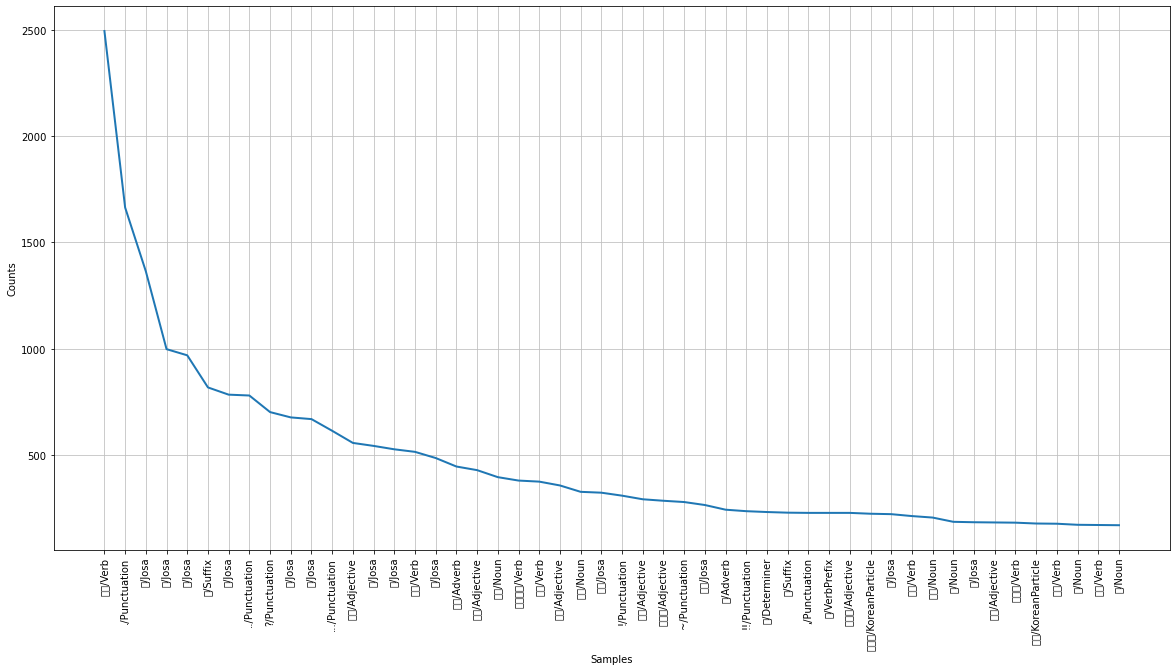

In [149]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
happy_text.plot(50)

In [150]:
HAPPY_FREQUENCY_COUNT = 10000;
happy_selected_words = [f[0] for f in happy_text.vocab().most_common(HAPPY_FREQUENCY_COUNT)]

In [151]:
def happy_term_frequency(doc):
    return [doc.count(word) for word in happy_selected_words]

In [152]:
x_happy_train = [happy_term_frequency(d) for d,_ in train_happy_docs]
x_happy_test = [happy_term_frequency(d) for d,_ in test_happy_docs]
y_happy_train = [c for _,c in train_happy_docs]
y_happy_test = [c for _,c in test_happy_docs]

In [153]:
import numpy as np
x_happy_train = np.asarray(x_happy_train).astype('float32')
x_happy_test = np.asarray(x_happy_test). astype('float32')

y_happy_train = np.asarray(y_happy_train).astype('float32')
y_happy_test = np.asarray(y_happy_test).astype('float32')

In [154]:
import tensorflow as tf
happy_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(HAPPY_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [155]:
happy_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [ ]:
happy_model.fit(x_happy_train, y_happy_train, epochs=5000, batch_size=512)

In [ ]:
happy_results = happy_model.evaluate(x_happy_test, y_happy_test)

In [ ]:
happy_results

In [ ]:
happy_model.save('happy_model.h5')

In [ ]:
happy_review = "너무 화난다"
happy_token = tokenize(happy_review)
happy_token

In [ ]:
tf = happy_term_frequency(happy_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(happy_model.predict(data))

In [ ]:
def happy_predict(predict):
    happy_token = tokenize(predict)
    happy_tfq = happy_term_frequency(happy_token)
    happy_data = np.expand_dims(np.asarray(happy_tfq).astype('float32'), axis=0)
    happy_score = float(happy_model.predict(happy_data))
    if(happy_score > 0.5):
        print(f"{predict} ==> 행복 ({round(happy_score*100)}%)")
    else:
        print(f"{predict} ==> 행복X ({round((1-happy_score)*100)}%)")

In [ ]:
happy_predict("너무해")

In [ ]:
#혐오 감정 분석

In [ ]:
import pandas as pd
train_disgust_df = pd.read_csv("disgusttraindata.txt","\t")
test_disgust_df = pd.read_csv("disgusttestdata.txt","\t")

In [ ]:
from konlpy.tag import Okt
okt_disgust = Okt()

In [ ]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_disgust.pos(doc, norm=True, stem=True)]

In [ ]:
train_disgust_docs = [(tokenize(row[1]), row[2]) for row in train_disgust_df.values]
test_disgust_docs = [(tokenize(row[1]),row[2]) for row in test_disgust_df.values]

In [ ]:
print(train_disgust_docs[0])
print(test_disgust_docs[0])

In [ ]:
tokens = [t for d in train_disgust_docs for t in d[0]]
print("토큰개수:",len(tokens))

In [ ]:
import nltk
disgust_text = nltk.Text(tokens, name='NMSC')
print(len(disgust_text.tokens))
print(len(set(disgust_text.tokens)))
print(disgust_text.vocab().most_common(10))

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
disgust_text.plot(50)

In [ ]:
DISGUST_FREQUENCY_COUNT = 10000;
disgust_selected_words = [f[0] for f in disgust_text.vocab().most_common(DISGUST_FREQUENCY_COUNT)]

In [ ]:
def disgust_term_frequency(doc):
    return [doc.count(word) for word in disgust_selected_words]

In [ ]:
x_disgust_train = [disgust_term_frequency(d) for d,_ in train_disgust_docs]
x_disgust_test = [disgust_term_frequency(d) for d,_ in test_disgust_docs]
y_disgust_train = [c for _,c in train_disgust_docs]
y_disgust_test = [c for _,c in test_disgust_docs]

In [ ]:
import numpy as np
x_disgust_train = np.asarray(x_disgust_train).astype('float32')
x_disgust_test = np.asarray(x_disgust_test). astype('float32')

y_disgust_train = np.asarray(y_disgust_train).astype('float32')
y_disgust_test = np.asarray(y_disgust_test).astype('float32')

In [ ]:
import tensorflow as tf
disgust_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(DISGUST_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
disgust_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [ ]:
disgust_model.fit(x_disgust_train, y_disgust_train, epochs=5000, batch_size=512)

In [ ]:
disgust_results = neutral_model.evaluate(x_disgust_test, y_disgust_test)

In [ ]:
disgust_results

In [ ]:
disgust_model.save('disgust_model.h5')

In [ ]:
disgust_review = "너무 화난다"
disgust_token = tokenize(disgust_review)
disgust_token

In [ ]:
tf = disgust_term_frequency(disgust_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(disgust_model.predict(data))

In [ ]:
def disgust_predict(predict):
    disgust_token = tokenize(predict)
    disgust_tfq = disgust_term_frequency(disgust_token)
    disgust_data = np.expand_dims(np.asarray(disgust_tfq).astype('float32'), axis=0)
    disgust_score = float(disgust_model.predict(disgust_data))
    if(disgust_score > 0.5):
        print(f"{predict} ==> 혐오 ({round(disgust_score*100)}%)")
    else:
        print(f"{predict} ==> 혐오X ({round((1-disgust_score)*100)}%)")

In [ ]:
disgust_predict("원재상")

In [ ]:
def predict(predict):
    disgust_predict(predict)
    sadness_predict(predict)
    happy_predict(predict)
    anger_predict(predict)
    fear_predict(predict)
    neutral_predict(predict)
    surprise_predict(predict)

In [247]:
predict("집에 가고 싶다")

집에 가고 싶다 ==> 혐오X (99%)
집에 가고 싶다 ==> 슬픔 (100%)
집에 가고 싶다 ==> 행복X (100%)
집에 가고 싶다 ==> 분노X (100%)
집에 가고 싶다 ==> 공포X (100%)
집에 가고 싶다 ==> 중립 (100%)
집에 가고 싶다 ==> 놀람X (100%)
